**Disclaimer:** Dataset and homework are made up for educational purposes.

**Dataset:** `wiki_machine_learning.csv`

**Description:** The data represents how many times the Wikipedia page of "Machine Learning" was read during a certain period of time. The data is presented in CSV format with the following columns: `date`, `count`, `lang`, `page`, `rank`, `month`, `title`. Null values in the `count` column are represented by 0, and these should be removed during preprocessing.

### Column Explanations

1. **date**: The dates on which the Wikipedia page was read, formatted as `datetime`.
2. **count**: The number of times the page was read. Null values (represented as zeros) must be removed during preprocessing.
3. **lang**: The language of the page (e.g., "en" for English).
4. **page**: The name of the Wikipedia page (in this case, "Machine Learning").
5. **rank**: The ranking of the page based on the number of reads, indicating its popularity.
6. **month**: The month extracted from the date, represented numerically (1-12).
7. **title**: The title of the page (in this case, "Machine Learning").

### Task

You are asked to create a model using **Facebook Prophet** and **Neural Prophet** algorithms to predict how many times the article will be read in the future for the next 30 days (using the `count` column).

**Disclaimer:** Dataset və ev tapşırığı tədris məqsədləri üçün hazırlanmışdır.

**Dataset:** `wiki_machine_learning.csv`

**Təsvir:** Bu məlumat "Maşın Öyrənmə" Wikipedia səhifəsinin müəyyən bir dövr ərzində neçə dəfə oxunduğunu göstərir. Məlumat CSV formatında aşağıdakı sütunlarla təqdim olunur: `date`, `count`, `lang`, `page`, `rank`, `month`, `title`. `count` sütunundakı null dəyərlər 0 ilə göstərilir və bunlar preprocessinq zamanı silinməlidir.

### Sütunların Təsvirləri

1. **date**: Wikipedia səhifəsinin oxunduğu tarixlər, `datetime` formatında.
2. **count**: Səhifənin neçə dəfə oxunduğunu göstərir. Null dəyərlər (0 ilə göstərilən) preprocessinq zamanı silinməlidir.
3. **lang**: Səhifənin dili (məsələn, "en" ingilis dili üçün).
4. **page**: Wikipedia səhifəsinin adı (bu halda "Maşın Öyrənmə").
5. **rank**: Oxunma sayına əsasən səhifənin reytinqi, onun populyarlığını göstərir.
6. **month**: Tarixdən çıxarılan ay, ədədi şəkildə (1-12) göstərilir.
7. **title**: Səhifənin adı (bu halda "Maşın Öyrənmə").

### Tapşırıq

Sizdən **Facebook Prophet** və **Neural Prophet** alqoritmlərini istifadə edərək `count` sütunundan istifadə edərək gələcək 30 gün ərzində səhifənin neçə dəfə oxunacağını proqnozlaşdıran bir model yaratmağınız xahiş olunur.

In [1]:
import warnings  # Xəbərdarlıqları idarə etmək üçün lazımlı kitabxananı yükləyir
import itertools  # İterasiya alətləri üçün lazımlı kitabxana
import numpy as np  # Sayısal hesablamalar üçün Numpy kitabxanasını yükləyir
import matplotlib.pyplot as plt  # Qrafiklər çəkmək üçün Matplotlib-in pyplot modülünü yükləyir
warnings.filterwarnings("ignore")  # Xəbərdarlıqları gizlətmək üçün istifadə olunur
plt.style.use('fivethirtyeight')  # Qrafiklərin stilini 'fivethirtyeight' stili ilə təyin edir
import pandas as pd  # Məlumat analizi üçün Pandas kitabxanasını yükləyir
import matplotlib  # Matplotlib kitabxanasını qlobal parametrləri dəyişmək üçün yükləyir

# Qrafik oxlarının etiket ölçüsünü təyin edir
matplotlib.rcParams['axes.labelsize'] = 14  
# X oxunun etiket ölçüsünü təyin edir
matplotlib.rcParams['xtick.labelsize'] = 12  
# Y oxunun etiket ölçüsünü təyin edir
matplotlib.rcParams['ytick.labelsize'] = 12  
# Bütün mətnlərin rəngini qara edir
matplotlib.rcParams['text.color'] = 'k'  


In [2]:
import copy
import pandas as pd
data = pd.read_csv(r'C:\Users\dell\Desktop\Python\week10\wiki_machine_learning.csv', sep=' ')
df = copy.deepcopy(data.reset_index(drop=True))
df

date  count lang              page  rank   month             title
0    2015-01-01   1414   en  Machine_learning  8708  201501  Machine_learning
1    2015-01-02   1920   en  Machine_learning  8708  201501  Machine_learning
2    2015-01-03   1338   en  Machine_learning  8708  201501  Machine_learning
3    2015-01-04   1404   en  Machine_learning  8708  201501  Machine_learning
4    2015-01-05   2264   en  Machine_learning  8708  201501  Machine_learning
..          ...    ...  ...               ...   ...     ...               ...
379  2016-01-16   1644   en  Machine_learning  8708  201601  Machine_learning
380  2016-01-17   1836   en  Machine_learning  8708  201601  Machine_learning
381  2016-01-18   2983   en  Machine_learning  8708  201601  Machine_learning
382  2016-01-19   3389   en  Machine_learning  8708  201601  Machine_learning
383  2016-01-20   3559   en  Machine_learning  8708  201601  Machine_learning

[384 rows x 7 columns]

### 1. Data Type Check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    384 non-null    object
 1   count   384 non-null    int64 
 2   lang    384 non-null    object
 3   page    384 non-null    object
 4   rank    384 non-null    int64 
 5   month   384 non-null    int64 
 6   title   384 non-null    object
dtypes: int64(3), object(4)
memory usage: 21.1+ KB


In [4]:
df.columns

Index(['date', 'count', 'lang', 'page', 'rank', 'month', 'title'], dtype='object')

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 384 entries, 0 to 383
Series name: date
Non-Null Count  Dtype         
--------------  -----         
384 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.1 KB


In [7]:
df['month'] = pd.to_datetime(df.month, format='%Y%m').dt.strftime('%Y-%B')

In [8]:
df.month.info()

<class 'pandas.core.series.Series'>
RangeIndex: 384 entries, 0 to 383
Series name: month
Non-Null Count  Dtype 
--------------  ----- 
384 non-null    object
dtypes: object(1)
memory usage: 3.1+ KB


In [9]:
df

date  count lang              page  rank         month  \
0   2015-01-01   1414   en  Machine_learning  8708  2015-January   
1   2015-01-02   1920   en  Machine_learning  8708  2015-January   
2   2015-01-03   1338   en  Machine_learning  8708  2015-January   
3   2015-01-04   1404   en  Machine_learning  8708  2015-January   
4   2015-01-05   2264   en  Machine_learning  8708  2015-January   
..         ...    ...  ...               ...   ...           ...   
379 2016-01-16   1644   en  Machine_learning  8708  2016-January   
380 2016-01-17   1836   en  Machine_learning  8708  2016-January   
381 2016-01-18   2983   en  Machine_learning  8708  2016-January   
382 2016-01-19   3389   en  Machine_learning  8708  2016-January   
383 2016-01-20   3559   en  Machine_learning  8708  2016-January   

                title  
0    Machine_learning  
1    Machine_learning  
2    Machine_learning  
3    Machine_learning  
4    Machine_learning  
..                ...  
379  Machine_learning  
380  Machine_learning  
381  Machine_learning  
382  Machine_learning  
383  Machine_learning  

[384 rows x 7 columns]

### 2.Missing values

In [10]:
df.isnull().sum()

date     0
count    0
lang     0
page     0
rank     0
month    0
title    0
dtype: int64

In [11]:
df[df['count']==0]

date  count lang              page  rank          month  \
35 2015-02-05      0   en  Machine_learning  8708  2015-February   

               title  
35  Machine_learning

In [12]:
import numpy as np
df['count'] = df['count'].replace(to_replace=0, value=np.nan)

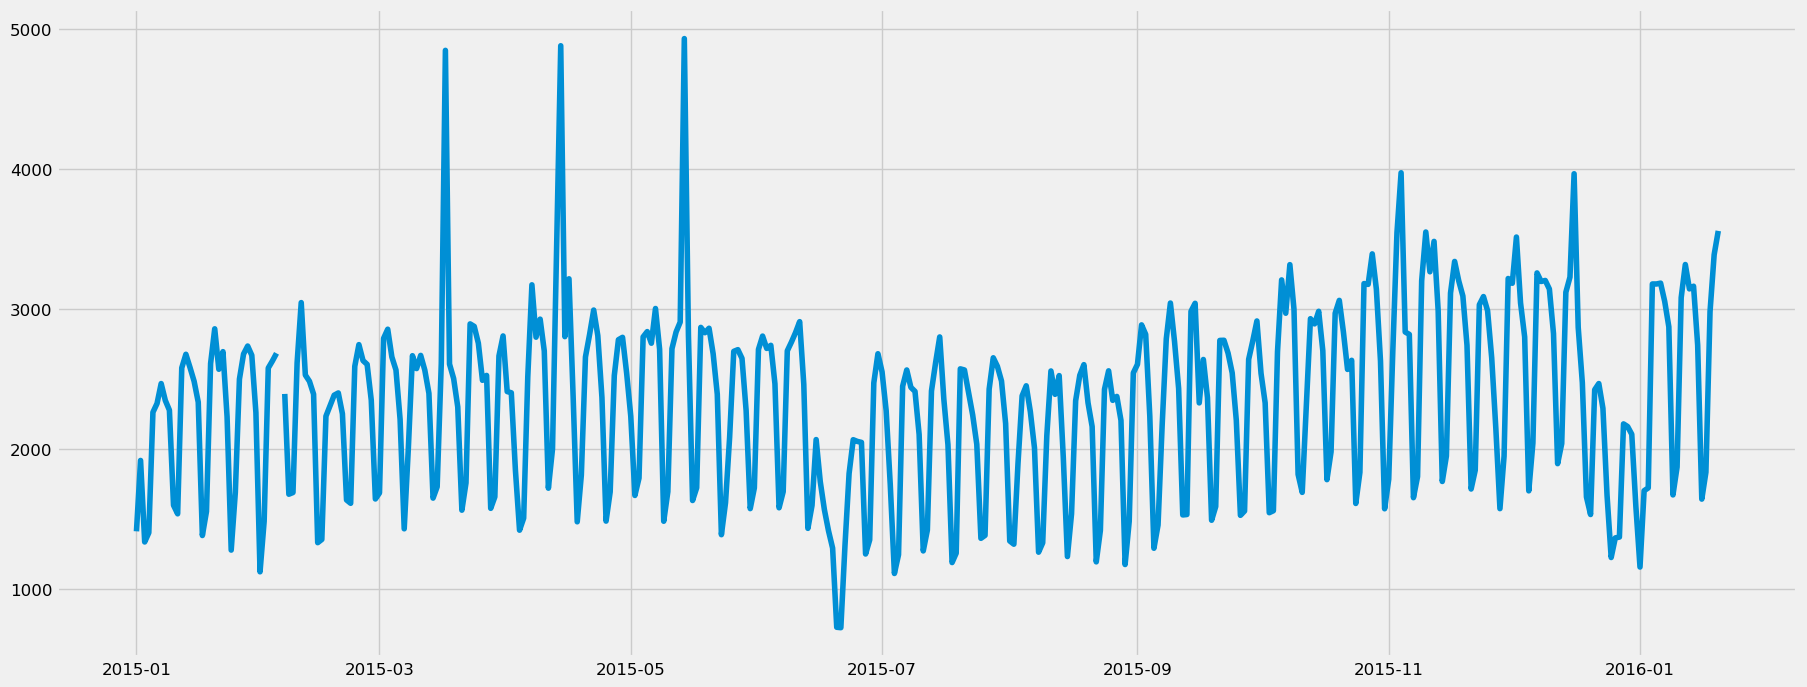

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.plot(df['date'], df['count'])

### Null value fill

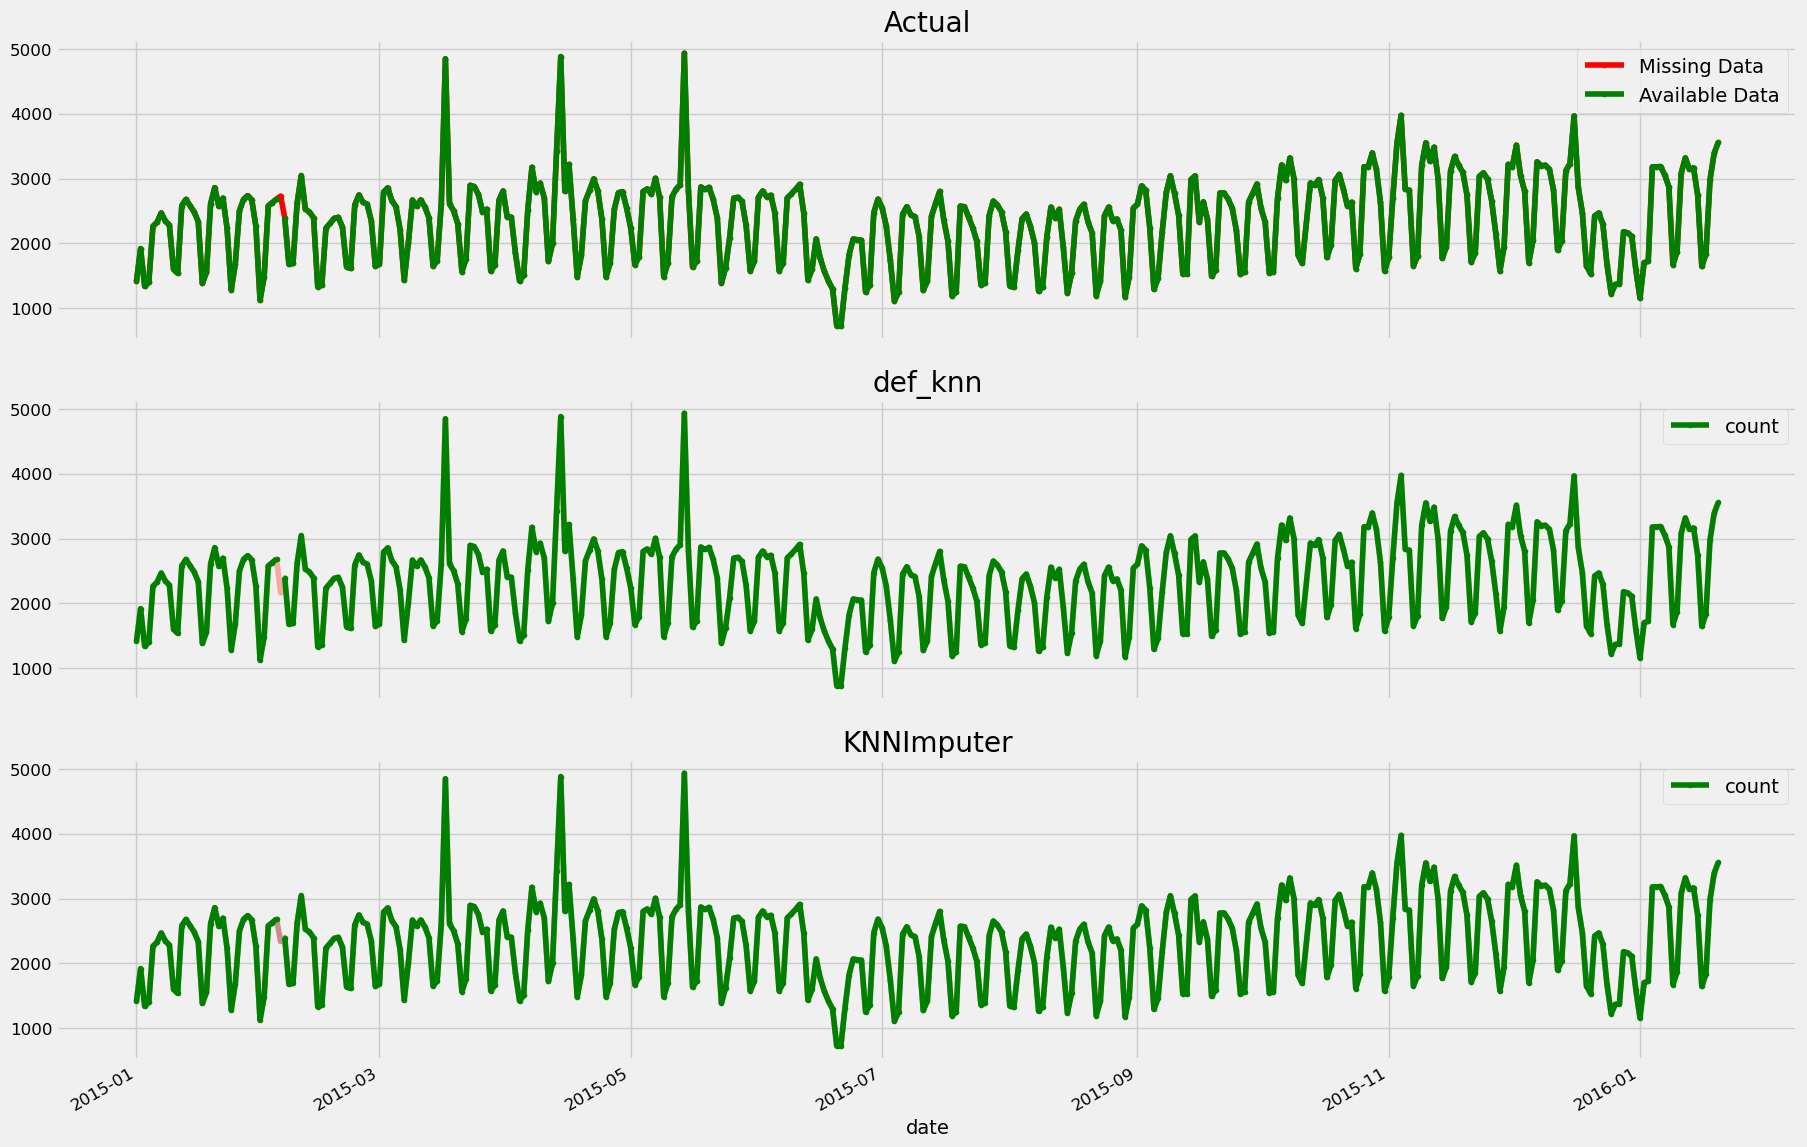

In [14]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20, 15))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df[['date', 'count']].set_index('date').interpolate (method = 'cubic').\
                                        plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df[['date', 'count']].set_index('date').plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])


## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

knn_result = knn_mean(df['count'], 8)
axes[1].plot(df['date'], knn_result, label='KNN Mean', color='tomato', alpha=0.5, linestyle='-')
df[['date', 'count']].set_index('date').plot(title='def_knn', ax=axes[1], label='Actual', color='green', style=".-")

### Elave
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=8)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df[['count']]))
axes[2].plot(df['date'], df_knn_imputed, label='KNNImputer', color='brown', alpha=0.5, linestyle="-")
df[['date', 'count']].set_index('date').plot(title='KNNImputer', ax=axes[2], label='Actual', color='green', style=".-")
plt.show()

In [15]:
df.isnull().sum()

date     0
count    1
lang     0
page     0
rank     0
month    0
title    0
dtype: int64

### KNNImputer Null Value Fill 

In [16]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=8)
df['count'] = knn_imputer.fit_transform(df[['count']])

In [17]:
df.isnull().sum()

date     0
count    0
lang     0
page     0
rank     0
month    0
title    0
dtype: int64

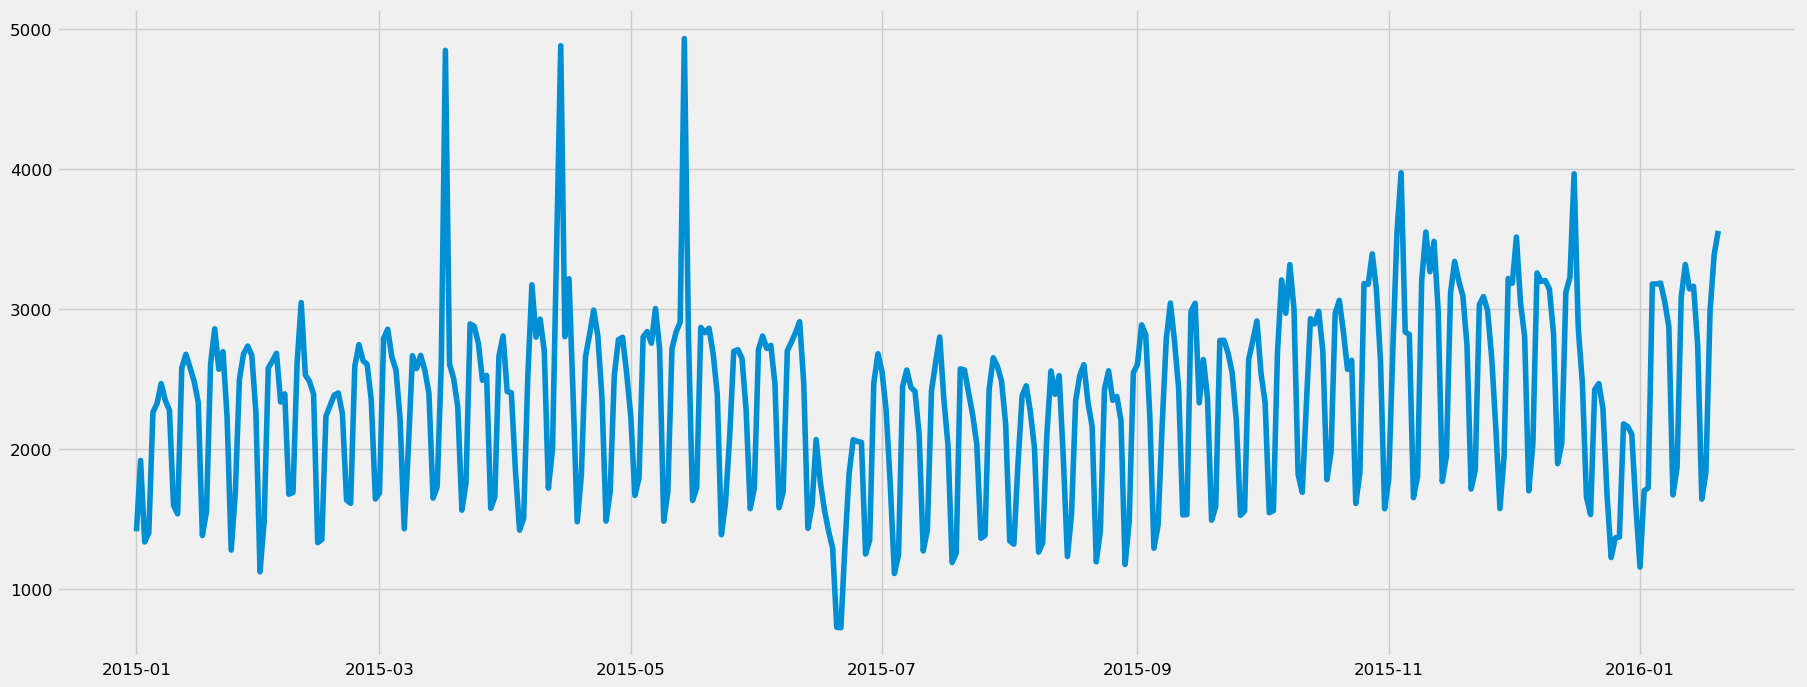

In [18]:
plt.figure(figsize=(20, 8))
plt.plot(df['date'], df['count'])
plt.show()

### 3. Missing Days Check

In [19]:
import pandas as pd

# Məsələn, 2015-01-01 və 2016-12-31 aralığını yoxlayaq
start_date = df.iloc[0, 0]
end_date = df.iloc[-1, 0]

# Tarix aralığını əhatə edən tam tarix siyahısı yaradırıq
full_date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# `date` sütununun datetime formatında olduğundan əmin olun
df['date'] = pd.to_datetime(df['date'])

# 'date' sütununda olmayan tarixləri müəyyən edirik
missing_dates = full_date_range.difference(df['date'])

if not missing_dates.empty:
    print("Buraxılmış tarixlər var:")
    print(missing_dates)
else:
    print("Tarix aralığında heç bir gün buraxılmayıb.")

Buraxılmış tarixlər var:
DatetimeIndex(['2015-10-12'], dtype='datetime64[ns]', freq='D')


### Fill Missing Date

In [20]:
df_full= pd.DataFrame()
df_full['date'] = pd.date_range (start = df.iloc[0, 0], end =df.iloc[-1, 0]) 
df = pd.merge(df_full, df, on= 'date', how = 'left') 
df[df.date=='2015-10-12']

date  count lang page  rank month title
284 2015-10-12    NaN  NaN  NaN   NaN   NaN   NaN

### Fill Missing Count

In [21]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=8)
df['count'] = knn_imputer.fit_transform(df[['count']])

### Check Missing Date and Count

In [22]:
df[df.date=='2015-10-12']

date        count lang page  rank month title
284 2015-10-12  2337.532637  NaN  NaN   NaN   NaN   NaN

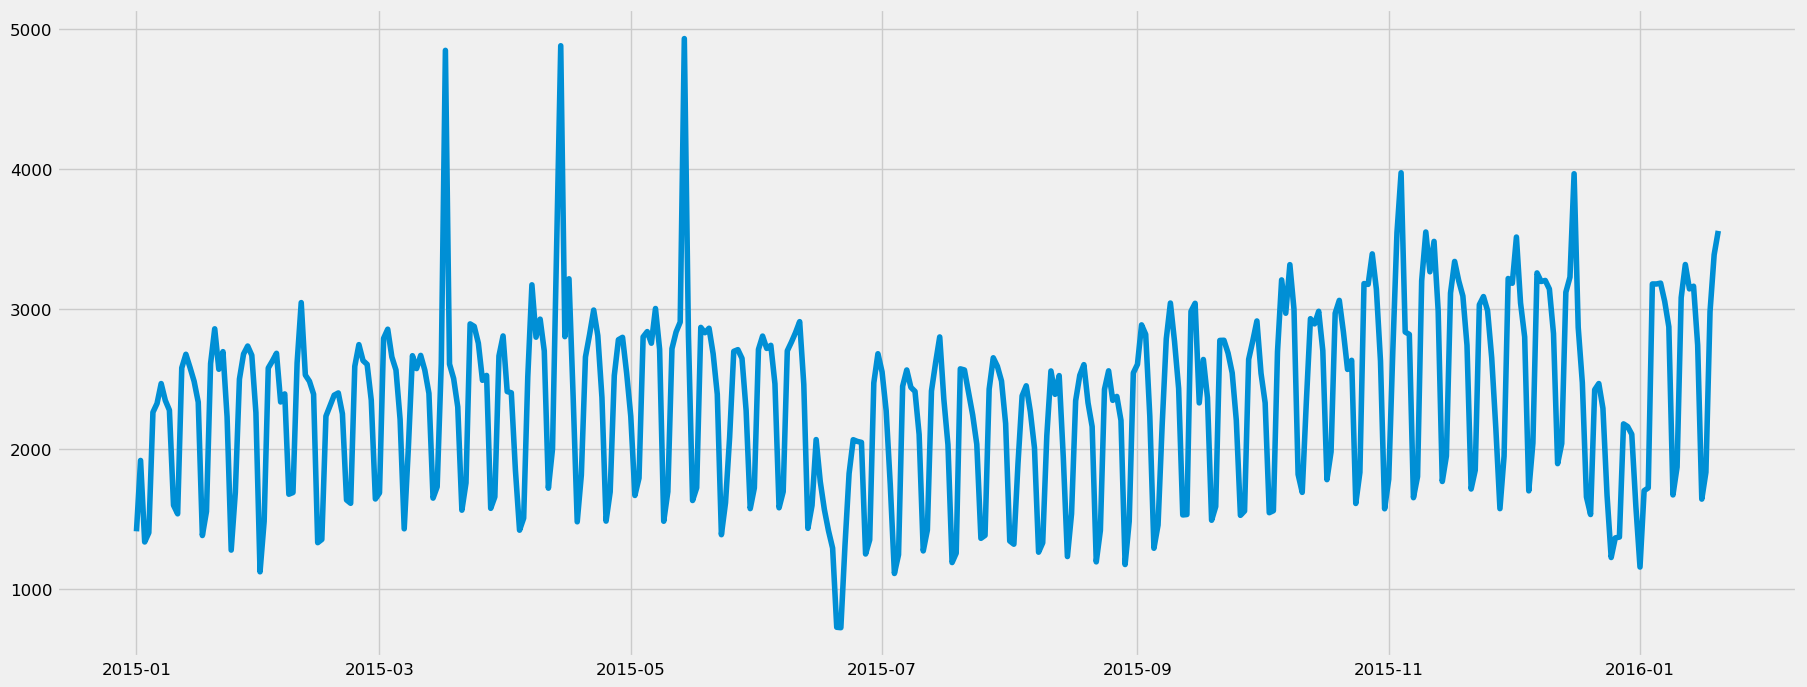

In [23]:
plt.figure(figsize=(20, 8))
plt.plot(df['date'], df['count'])
plt.show()

### Daytime Time Series every Year PLot

In [24]:
# Prepare data
df_yr = copy.deepcopy(df.set_index('date'))

df_yr['year'] = [d.year for d in df_yr.index]
df_yr['day'] = [d.strftime('%m%d') for d in df_yr.index]
years = df_yr['year'].unique()

In [25]:
import numpy as np
import matplotlib as mpl
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()),
                            len(years),
                            replace=False)

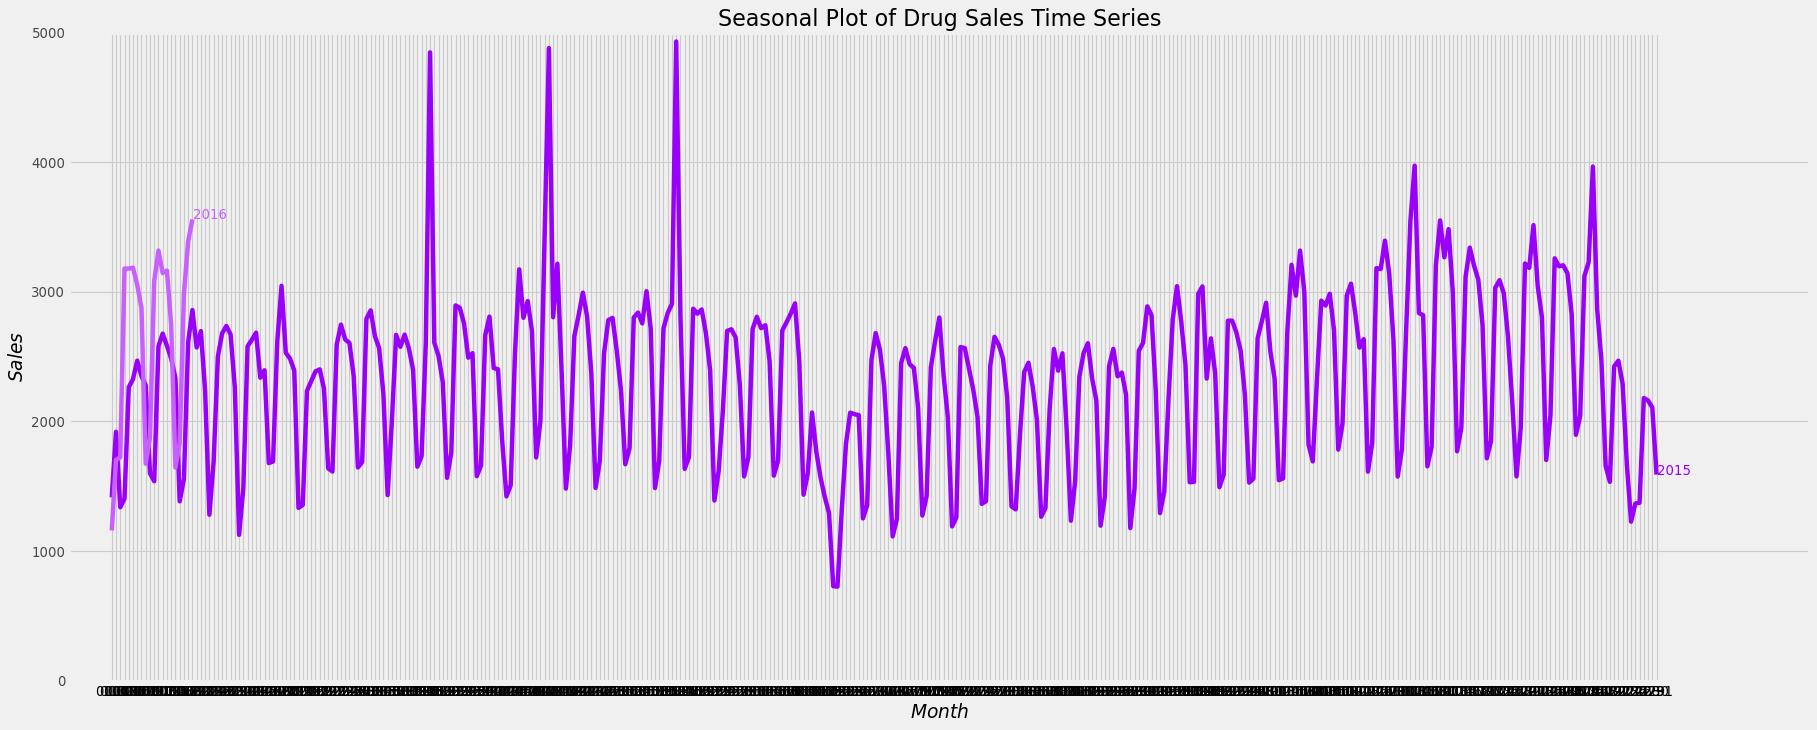

In [26]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Draw Plot
plt.figure(figsize=(25, 10), dpi=80)
for i, y in enumerate(years):
    if i >= 0:
        plt.plot('day', 'count', data=df_yr.loc[df_yr.year==y, :], color=mycolors[i], label=y)
        plt.text(df_yr.loc[df_yr.year==y, :].shape[0]-.9, df_yr.loc[df_yr.year==y, 'count'][-1:].values[0], y, fontsize=12, 
                                                                                             color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-10, 400), ylim=(0, 5000), ylabel='$Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

### Monthly Time Series every Year BoxPLot

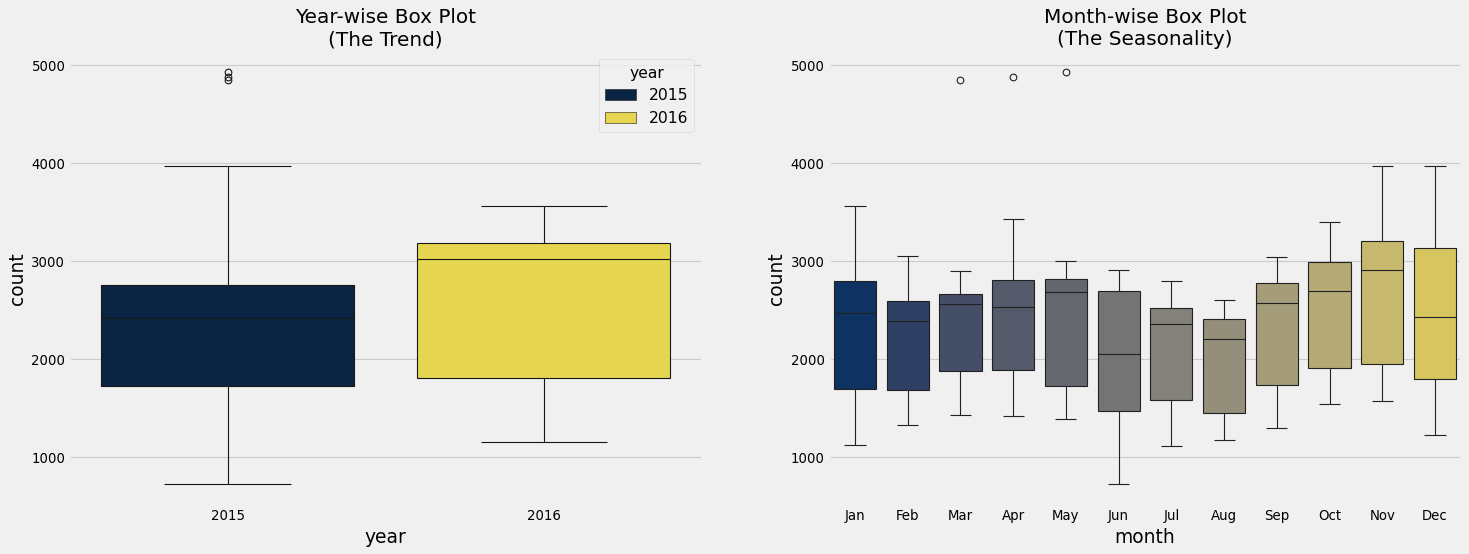

In [27]:
# Prepare data
import seaborn as sns
df_date = copy.deepcopy(df.set_index('date'))

df_date['year'] = [d.year for d in df_date.index]
df_date['month'] = [d.strftime('%b') for d in df_date.index]
years = df_date['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='count', data=df_date, ax=axes[0], hue='year', palette='cividis')
sns.boxplot(x='month', y='count', data=df_date.loc[~df_date.year.isin([1991, 2008]), :], ax=axes[1], hue='month',
                                                                                            palette='cividis')

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

### Montly Bar Plot

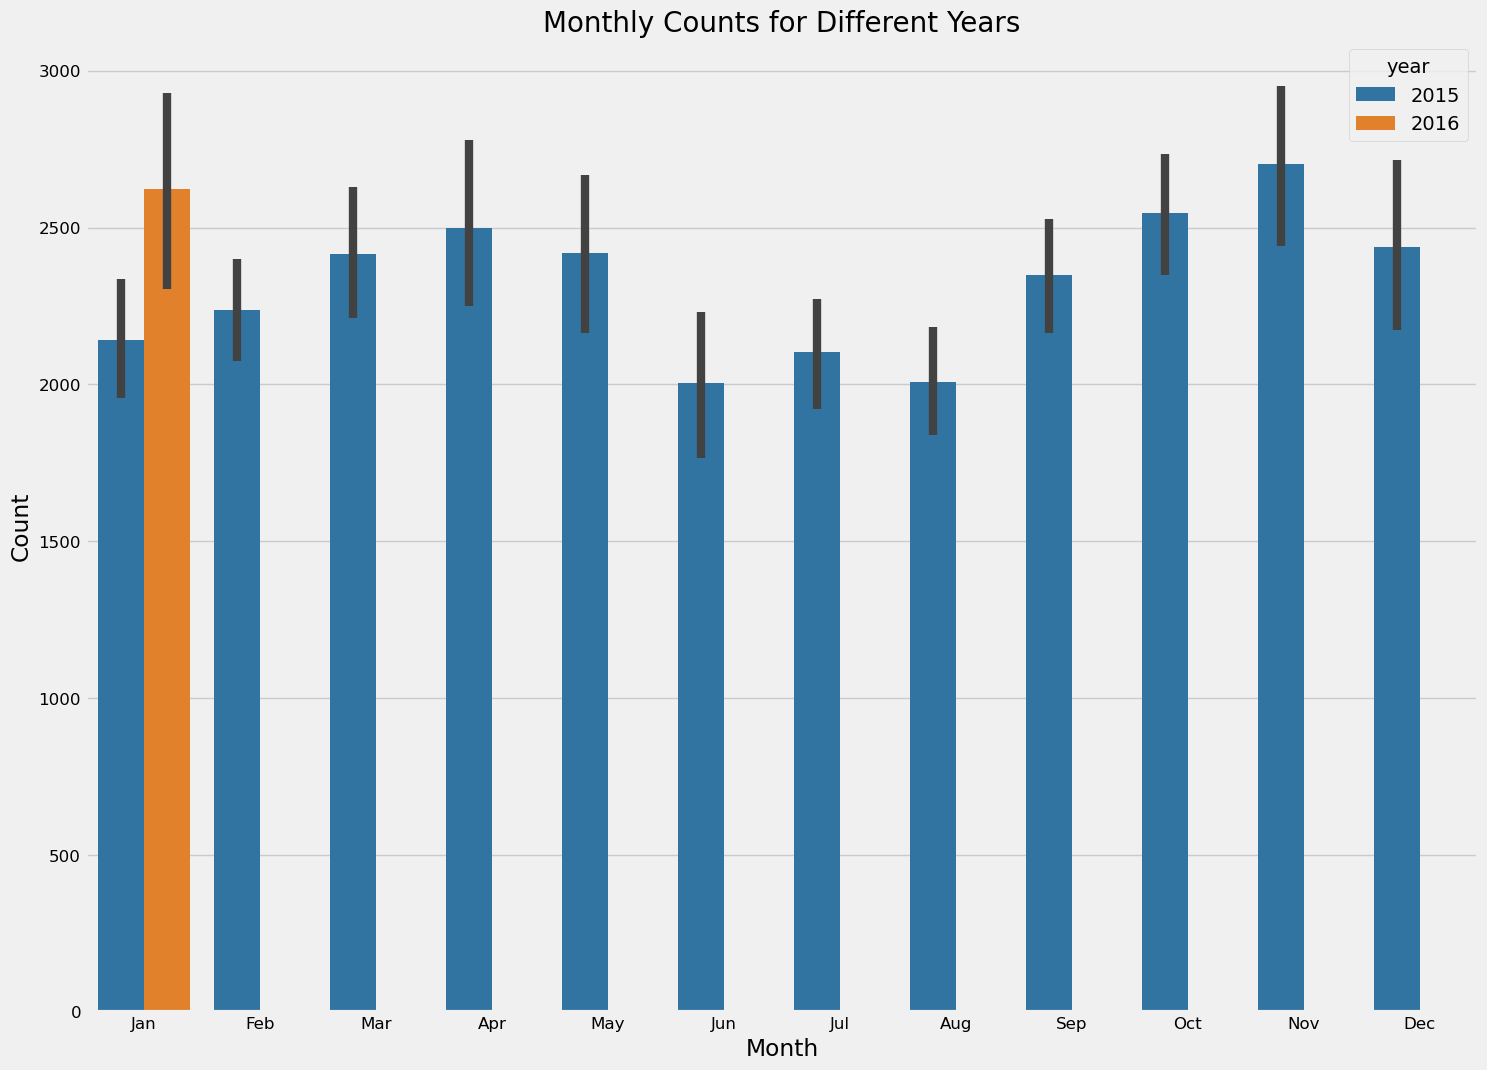

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
sns.barplot(x='month', y='count', hue='year', data=df_date, palette="tab10")
plt.title("Monthly Counts for Different Years", fontsize=20)
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


### Test for Stationarity

In [29]:
from statsmodels.tsa.stattools import adfuller, kpss

In [30]:
from statsmodels.tsa.stattools import adfuller  # ADF testini yerinə yetirmək üçün lazımlı funksiyanı yükləyir

# ADF Test
result = adfuller(df['count'].values, autolag='AIC')  # 'value' sütununu istifadə edərək ADF testini yerinə yetirir
print(f'ADF Statistic: {result[0]}')  # ADF statistik dəyərini çap edir
print(f'p-value: {result[1]}')  # p-dəyərini çap edir
for key, value in result[4].items():  # Tənqidi dəyərləri çap etmək üçün döngü
    print('Critial Values:')  # 'Critial Values' başlığını çap edir
    print(f'{key}, {value}')  # Tənqidi dəyəri və onun müvafiq dəyərini çap edir


ADF Statistic: -3.318818153766517
p-value: 0.014057973683173063
Critial Values:
1%, -3.448196541708585
Critial Values:
5%, -2.869404683789669
Critial Values:
10%, -2.5709597356805545


### Autocorrelation and Partial Autocorrelation

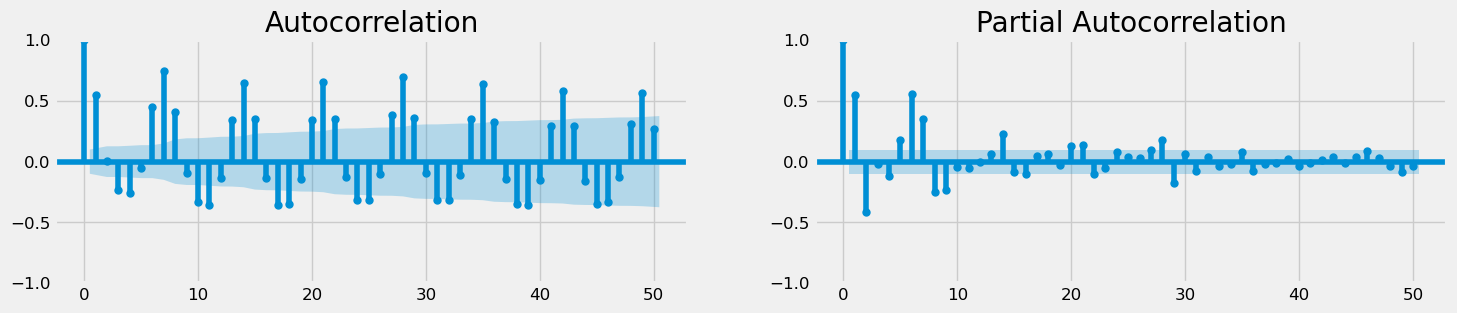

In [31]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 50 gecikməyə qədər ACF və PACF hesablanır - hazırda şərhə alınıb
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# ACF və PACF qrafiklərini çəkmək üçün 1x2 ölçülü subplot yaradırıq
fig, axes = plt.subplots(1, 2, figsize=(16, 3), dpi=100)

# Məlumatın ACF qrafiki çəkilir, 50 gecikməyə qədər
# tolist() metodu, Pandas DataFrame və ya Series-dən bir Python listi yaratmaq üçün istifadə olunur
plot_acf(df['count'].tolist(), lags=50, ax=axes[0])

# Məlumatın PACF qrafiki çəkilir, 50 gecikməyə qədər
# tolist() metodu, Pandas DataFrame və ya Series-dən bir Python listi yaratmaq üçün istifadə olunur
plot_pacf(df['count'].tolist(), lags=50, ax=axes[1])
plt.show()

## ARIMA MODEL

In [32]:
df_ar = copy.deepcopy(df)
df_ar

date   count lang              page    rank         month  \
0   2015-01-01  1414.0   en  Machine_learning  8708.0  2015-January   
1   2015-01-02  1920.0   en  Machine_learning  8708.0  2015-January   
2   2015-01-03  1338.0   en  Machine_learning  8708.0  2015-January   
3   2015-01-04  1404.0   en  Machine_learning  8708.0  2015-January   
4   2015-01-05  2264.0   en  Machine_learning  8708.0  2015-January   
..         ...     ...  ...               ...     ...           ...   
380 2016-01-16  1644.0   en  Machine_learning  8708.0  2016-January   
381 2016-01-17  1836.0   en  Machine_learning  8708.0  2016-January   
382 2016-01-18  2983.0   en  Machine_learning  8708.0  2016-January   
383 2016-01-19  3389.0   en  Machine_learning  8708.0  2016-January   
384 2016-01-20  3559.0   en  Machine_learning  8708.0  2016-January   

                title  
0    Machine_learning  
1    Machine_learning  
2    Machine_learning  
3    Machine_learning  
4    Machine_learning  
..                ...  
380  Machine_learning  
381  Machine_learning  
382  Machine_learning  
383  Machine_learning  
384  Machine_learning  

[385 rows x 7 columns]

### Addım 1: Stasionarlıq yoxlanışı və düzəldilməsi
- Zaman seriyası stasionar deyilsə, stasionarlıq üçün fərqləndirmə tətbiq edə bilərik (d parametri ilə). Önəmli olan verinin trend və seasonality kimi qeyri-stasionar komponentlərdən təmizlənməsi.

In [33]:
from statsmodels.tsa.stattools import adfuller  # ADF testini yerinə yetirmək üçün lazımlı funksiyanı yükləyir

# ADF Test
result = adfuller(df_ar['count'].values, autolag='AIC')  # 'value' sütununu istifadə edərək ADF testini yerinə yetirir
print(f'ADF Statistic: {result[0]}')  # ADF statistik dəyərini çap edir
print(f'p-value: {result[1]}')  # p-dəyərini çap edir
for key, value in result[4].items():  # Tənqidi dəyərləri çap etmək üçün döngü
    print('Critial Values:')  # 'Critial Values' başlığını çap edir
    print(f'{key}, {value}')  # Tənqidi dəyəri və onun müvafiq dəyərini çap edir

ADF Statistic: -3.318818153766517
p-value: 0.014057973683173063
Critial Values:
1%, -3.448196541708585
Critial Values:
5%, -2.869404683789669
Critial Values:
10%, -2.5709597356805545


- Əgər seriya stasionar deyilsə, birinci fərqləndirmə tətbiq edərək stasionarlaşdırırıq:

In [34]:
# df_ar['count'] = df_ar['count'].diff().dropna() #ehtiyac deyil stasionardir

### Addım 2: ARIMA model parametrlərinin təyin edilməsi
- ARIMA modelində p, d və q parametrlərini təyin etmək üçün ACF və PACF qrafiklərindən istifadə edə bilərik:

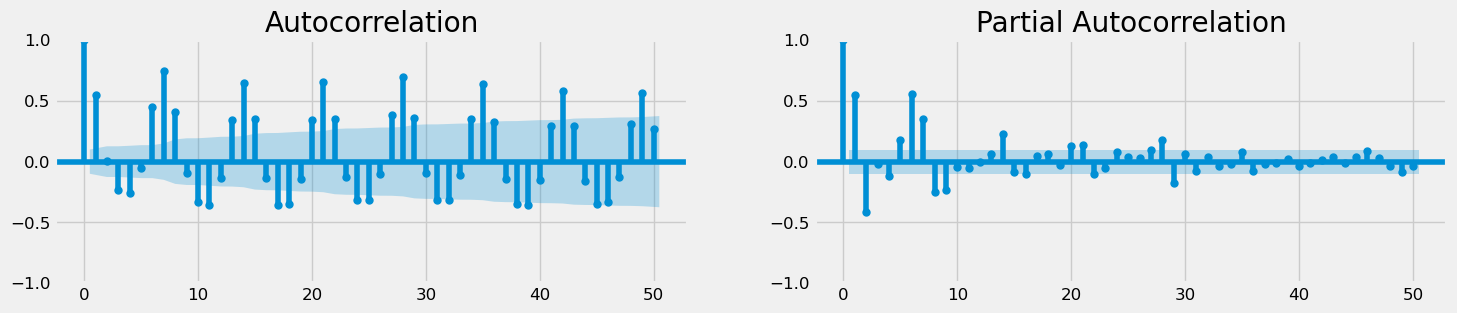

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# ACF və PACF qrafiklərini yarat
fig, axes = plt.subplots(1, 2, figsize=(16, 3))
plot_acf(df_ar['count'].dropna(), lags=50, ax=axes[0])
plot_pacf(df_ar['count'].dropna(), lags=50, ax=axes[1])
plt.show()

In [36]:
# p=1, d=0, q=2  teyin etdim

### Addım 3: ARIMA modelinin qurulması
- ARIMA modelini qurub öyrədək:

In [37]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA modelini qur (p, d, q dəyərlərini ACF və PACF-dən götür)
model = ARIMA(df_ar['count'], order=(3, 1, 3))  # p, d, q real dəyərlərlə əvəz edin
model_fit = model.fit()

# Modelin xülasəsini göstər
model_fit.summary()


C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  count   No. Observations:                  385
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -2857.786
Date:                Tue, 29 Oct 2024   AIC                           5729.572
Time:                        11:15:43   BIC                           5757.227
Sample:                             0   HQIC                          5740.541
                                - 385                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3677      0.109     12.589      0.000       1.155       1.581
ar.L2         -1.1515      0.136     -8.493      0.000      -1.417      -0.886
ar.L3          0.1245      0.108      1.155      0.248      -0.087       0.336
ma.L1         -2.0200      0.072    -27.894      0.000      -2.162      -1.878
ma.L2          1.9557      0.098     19.890      0.000       1.763       2.148
ma.L3         -0.8034      0.070    -11.504      0.000      -0.940      -0.667
sigma2      2.327e+05   1.41e+04     16.503      0.000    2.05e+05     2.6e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):               354.04
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             1.01
Prob(H) (two-sided):                  0.36   Kurtosis:                         7.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Addım 4: Növbəti 30 gün üçün proqnoz
- Model öyrədildikdən sonra növbəti 30 gün üçün proqnoz verə bilərsiniz:

In [38]:
# 30 gün proqnoz ver
forecast_ar = model_fit.forecast(steps=30)

# Proqnozu göstərin
forecast_ar


# 30 gün üçün proqnoz və etibar intervalları
forecast_ar = model_fit.forecast(steps=30, alpha=0.05)

# 30 gün üçün proqnoz və etibar intervalları
forecast_results = model_fit.get_forecast(steps=30)  # Proqnoz və etibar intervalını əldə et
# forecast_ar = forecast_results.predicted_mean  # Proqnoz dəyərləri
conf_int = forecast_results.conf_int(alpha=0.05)  # 95% etibar intervalları

# Mövcud data çərçivəsinin son tarixini götürək
last_date = df_ar['date'].iloc[-1]

# Növbəti 30 günün tarixlərini yaratmaq
date_range = pd.date_range(start=last_date, periods=30, freq='D')

# Nəticələri DataFrame-ə yazırıq
forecast_ar = pd.DataFrame({
    'date': date_range,
    'forecast': forecast_ar,
    'lower CI': conf_int.iloc[:, 0],  # Aşağı etibar limiti
    'upper CI': conf_int.iloc[:, 1]   # Yuxarı etibar limiti
})

# Proqnozu və etibar intervallarını göstərin
forecast_ar

date     forecast     lower CI     upper CI
385 2016-01-20  2970.916682  2025.435244  3916.398121
386 2016-01-21  2309.154870  1308.149295  3310.160446
387 2016-01-22  1964.813479   934.111093  2995.515865
388 2016-01-23  2182.658135  1132.695280  3232.620991
389 2016-01-24  2794.721469  1733.089920  3856.353017
390 2016-01-25  3338.122642  2267.319827  4408.925456
391 2016-01-26  3403.666933  2320.897541  4486.436326
392 2016-01-27  2943.791246  1842.126783  4045.455708
393 2016-01-28  2306.999613  1180.442112  3433.557114
394 2016-01-29  1973.764312   823.313204  3124.215419
395 2016-01-30  2194.005173  1026.604501  3361.405845
396 2016-01-31  2799.665692  1621.766335  3977.565049
397 2016-02-01  3332.933204  2146.682931  4519.183477
398 2016-02-02  3392.288817  2195.128461  4589.449173
399 2016-02-03  2934.820567  1720.507356  4149.133779
400 2016-02-04  2307.186161  1070.330591  3544.041730
401 2016-02-05  1982.932546   724.419332  3241.445760
402 2016-02-06  2205.212896   931.267346  3479.158447
403 2016-02-07  2804.460551  1520.871376  4088.049726
404 2016-02-08  3327.726960  2036.396150  4619.057770
405 2016-02-09  3381.042362  2079.593626  4682.491099
406 2016-02-10  2926.030719  1608.754127  4243.307310
407 2016-02-11  2307.466328   969.459820  3645.472837
408 2016-02-12  1992.036993   634.116177  3349.957809
409 2016-02-13  2216.248088   844.085186  3588.410990
410 2016-02-14  2809.104545  1427.968148  4190.240942
411 2016-02-15  3322.505106  1934.102304  4710.907908
412 2016-02-16  3369.926798  1972.027174  4767.826421
413 2016-02-17  2917.419079  1504.742985  4330.095174
414 2016-02-18  2307.837571   875.885404  3739.789739

### Forecast vs Actual vs Confidence Interval

In [39]:
actual = df_ar[['date', 'count']].set_index('date')
forecast_ar_plot = forecast_ar[['date', 'forecast']].set_index('date')
lower_ci = forecast_ar[['date','lower CI']].set_index('date')
upper_ci = forecast_ar[['date','upper CI']].set_index('date')

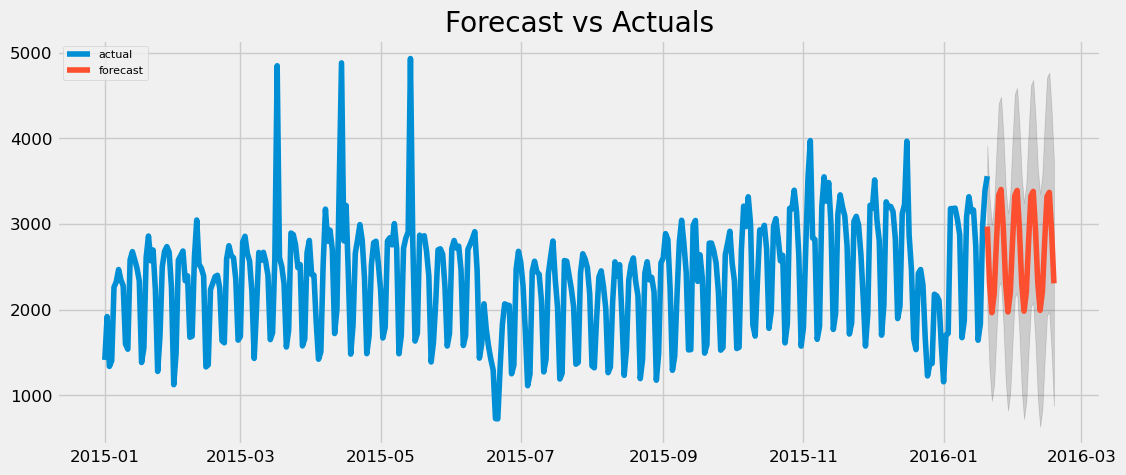

In [40]:
# Qrafik çəkir
plt.figure(figsize=(12,5), dpi=100)  # Şəkilin ölçüsünü və keyfiyyətini təyin edir
plt.plot(actual, label='actual')  # Train datasını qrafikdə çəkir
plt.plot(forecast_ar_plot, label='forecast')  # Real test dəyərlərini qrafikdə göstərir
plt.fill_between(lower_ci.index, lower_ci['lower CI'], upper_ci['upper CI'], 
                 color='k', alpha=.15)  # Etibar intervalını qrafikdə kölgə ilə göstərir
plt.title('Forecast vs Actuals')  # Qrafikin başlığını təyin edir
plt.legend(loc='upper left', fontsize=8)  # Əfsanəni yuxarı sol küncdə göstərir
plt.show()  # Qrafiki göstərir

### Metrics

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,\
                                                                                        root_mean_squared_error

# Real və proqnozlaşdırılmış dəyərlər
# y_true = df[df.date>='2015-01-20']['count'][:30] 
y_true = df['count'][-30:]  # Son 30 günün real dəyərləri (məsələn, data sırasından çıxarılır)
y_pred = forecast_ar['forecast']  # Son 30 günün proqnozlaşdırılmış dəyərləri (ARIMA modelinin nəticələri)


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): -0.6884524224137667
Mean Absolute Error (MAE): 838.0025879704398
Mean Absolute Percentage Error (MAPE): 0.4335592664497591
Mean Squared Error (MSE): 942477.2220220338
Root Mean Squared Error (RMSE): 970.8126606210045


## PMDARIMA

In [42]:
df_pmdar = copy.deepcopy(df.set_index('date')[['count']])
df_pmdar

count
date              
2015-01-01  1414.0
2015-01-02  1920.0
2015-01-03  1338.0
2015-01-04  1404.0
2015-01-05  2264.0
...            ...
2016-01-16  1644.0
2016-01-17  1836.0
2016-01-18  2983.0
2016-01-19  3389.0
2016-01-20  3559.0

[385 rows x 1 columns]

In [43]:
import pmdarima as pm
model = pm.auto_arima(df_pmdar,
                      start_p=1, # AR (AutoRegressive) komponenti üçün başlanğıc p dəyəri (başlanğıc gecikmə dərəcəsi)
                      start_q=1, # MA (Moving Average) komponenti üçün başlanğıc q dəyəri (başlanğıc gecikmə dərəcəsi)
                      test='adf', # d dəyərini təyin etmək üçün ADF (Augmented Dickey-Fuller) testindən istifadə edir
                      max_p=3,       # p üçün maksimum dəyər (AutoRegressive komponentin maksimum gecikmə dərəcəsi)
                      max_q=3,       # q üçün maksimum dəyər (Moving Average komponentin maksimum gecikmə dərəcəsi)
#                m=1,# Seriyanın tezliyi (1: hər müşahidə bir addım intervalında, mövsümsüz seriya üçün istifadə olunur)
                      d=None,        # d dəyəri (inteqrasiya dərəcəsi) avtomatik təyin olunur
                      seasonal=True,# Mövsümi komponentin nəzərə alınmaması üçün (mövsümsüz model)
                      start_P=0,     # Mövsümi AutoRegressive komponenti (SAR) üçün başlanğıc P dəyəri (sezon p)
                      D=0,           # Mövsümi inteqrasiya komponenti (mövsümi dərəcə) üçün D dəyəri (sezon d)
                      trace=True,    # Modelin təlim prosesi zamanı addımları izlə (parametrləri göstər)
                      error_action='ignore', # Xəta baş verərsə, onu gözardı et (modelin durmaması üçün)
                      suppress_warnings=True, # Xəbərdarlıqları göstərməmək üçün
                      stepwise=True # Addım-addım axtarış alqoritmindən istifadə et, modeli daha sürətli öyrənmək üçün
                     )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6017.384, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6033.711, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6031.482, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6024.983, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6031.744, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5856.488, Time=1.79 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5982.381, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5853.021, Time=2.86 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5972.745, Time=0.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.86 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5799.591, Time=2.46 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.56 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5877.481, Time=2.50 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5728.7

### model.params pmdarima ilə qurulmuş ARIMA modelinin parametrləri

In [44]:
model.params

<bound method ARIMA.params of ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)>

### Forecast vs Confidence Inteval vs Plot

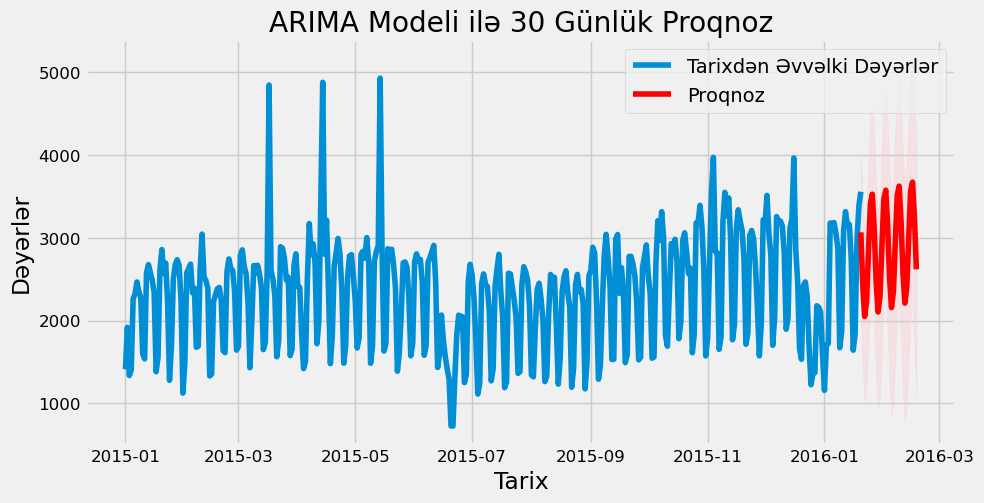

In [45]:
forecast_pmdar, conf_int = model.predict(n_periods=30, return_conf_int=True)

# 7. Proqnoz tarixlərini yaradın (proqnozun son tarixini əlavə edərək)
forecast_dates = pd.date_range(start=df_pmdar.index[-1], periods=30, freq='D', name='date')

# 8. Proqnozları və etibar intervallarını DataFrame olaraq saxlayın
forecast_pmdar = pd.DataFrame({'forecast': forecast_pmdar.values, 'Lower Bound': conf_int[:, 0], 
                            'Upper Bound': conf_int[:, 1]}, index=forecast_dates)

# 9. Nəticələri göstərin
plt.figure(figsize=(10,5))
plt.plot(df_pmdar, label='Tarixdən Əvvəlki Dəyərlər')
plt.plot(forecast_pmdar['forecast'], label='Proqnoz', color='red')
plt.fill_between(forecast_pmdar.index, forecast_pmdar['Lower Bound'], forecast_pmdar['Upper Bound'], color='pink', 
                                                                                                         alpha=0.3)
plt.title('ARIMA Modeli ilə 30 Günlük Proqnoz')
plt.xlabel('Tarix')
plt.ylabel('Dəyərlər')
plt.legend()

In [46]:
forecast_pmdar

forecast  Lower Bound  Upper Bound
date                                             
2016-01-20  3067.854632  2122.802025  4012.907240
2016-01-21  2422.148188  1424.610034  3419.686341
2016-01-22  2052.053100  1023.992312  3080.113889
2016-01-23  2235.567043  1184.259420  3286.874666
2016-01-24  2838.824793  1769.122116  3908.527470
2016-01-25  3412.292103  2325.368564  4499.215642
2016-01-26  3529.352004  2422.618853  4636.085155
2016-01-27  3107.771893  1976.815929  4238.727858
2016-01-28  2471.364926  1313.663000  3629.066852
2016-01-29  2105.565269   922.992810  3288.137727
2016-01-30  2291.412022  1088.731321  3494.092724
2016-01-31  2893.916264  1675.135829  4112.696698
2016-02-01  3464.178268  2230.238474  4698.118062
2016-02-02  3578.005546  2326.555896  4829.455195
2016-02-03  3155.602583  1882.667860  4428.537305
2016-02-04  2521.400599  1224.656963  3818.144235
2016-02-05  2159.169139   840.201548  3478.136730
2016-02-06  2347.256735  1010.250983  3684.262487
2016-02-07  2948.986752  1597.481139  4300.492365
2016-02-08  3516.045724  2150.837051  4881.254397
2016-02-09  3626.657473  2245.579289  5007.735658
2016-02-10  3203.450027  1802.862064  4604.037989
2016-02-11  2571.458757  1149.208225  3993.709290
2016-02-12  2212.784274   770.267101  3655.301447
2016-02-13  2403.093012   944.082841  3862.103183
2016-02-14  3004.035480  1531.727031  4476.343929
2016-02-15  3567.894508  2082.982001  5052.807016
2016-02-16  3675.307887  2175.771094  5174.844680
2016-02-17  3251.314241  1733.779067  4768.849414
2016-02-18  2621.539314  1083.998610  4159.080018

### Modelin diagnostik qrafikləri

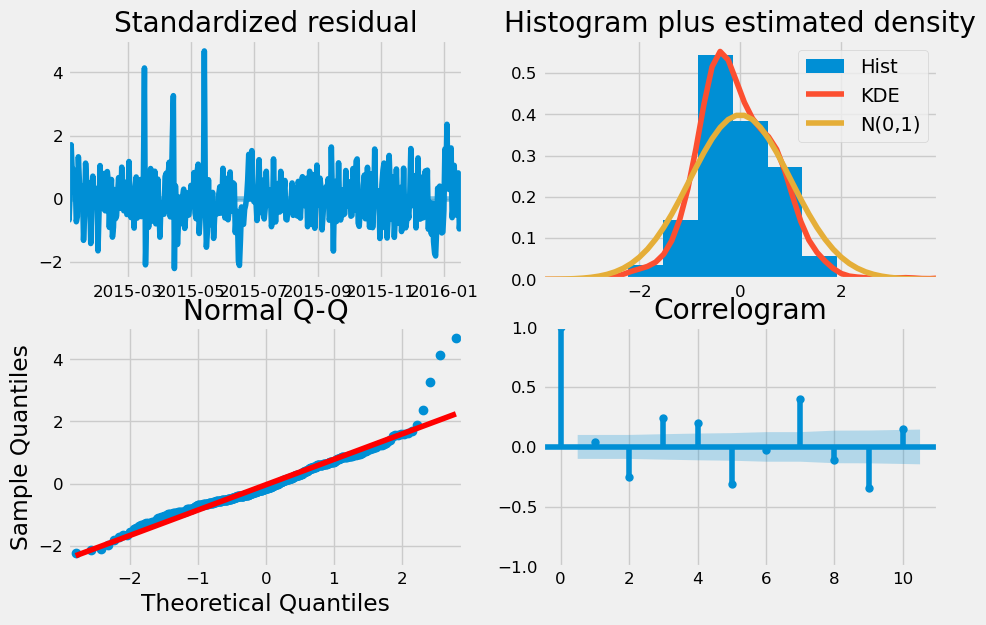

In [47]:
# Modelin diagnostik qrafikləri çıxarılır
model.plot_diagnostics(figsize=(10, 6.5))  

# Qrafikləri ekranda göstərir
plt.show() 

### Metrcis

In [48]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error



# Əsl dəyərləri götürmək (məsələn, df-də son 30 gün)
y_true = df_pmdar['count'][-30:]  # Burada 'value' əsl dəyərləri göstərən sütundur
# 30 günlük proqnoz verin
y_pred = forecast_pmdar['forecast']


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): -0.8267881957397634
Mean Absolute Error (MAE): 855.9055064747463
Mean Absolute Percentage Error (MAPE): 0.45768351143155067
Mean Squared Error (MSE): 1019694.8644144499
Root Mean Squared Error (RMSE): 1009.7994179115226


## Time Series Modeling with Prophet

In [49]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Selection Feature

In [50]:
df_prpht = copy.deepcopy(df)
df_prpht = df[['date', 'count']].rename(columns={"date": 'ds', "count": 'y'})
df_prpht

ds       y
0   2015-01-01  1414.0
1   2015-01-02  1920.0
2   2015-01-03  1338.0
3   2015-01-04  1404.0
4   2015-01-05  2264.0
..         ...     ...
380 2016-01-16  1644.0
381 2016-01-17  1836.0
382 2016-01-18  2983.0
383 2016-01-19  3389.0
384 2016-01-20  3559.0

[385 rows x 2 columns]

### Creat Model Prophet

In [51]:
from prophet import Prophet

model = Prophet(interval_width=0.95)
model.fit(df_prpht)

11:16:32 - cmdstanpy - INFO - Chain [1] start processing
11:16:33 - cmdstanpy - INFO - Chain [1] done processing


### Forecast

In [52]:
future = model.make_future_dataframe (periods = 30, freq='D')
forecast_prht = model.predict(future)
forecast_prht[['ds', 'yhat', 'trend', 'yhat_lower', 'yhat_upper']]

ds         yhat        trend   yhat_lower   yhat_upper
0   2015-01-01  2469.049209  2165.014836  1734.281854  3172.296868
1   2015-01-02  2153.406559  2167.748602  1452.818639  2842.994353
2   2015-01-03  1321.781704  2170.482369   562.382798  2049.793648
3   2015-01-04  1463.451789  2173.216135   791.153018  2195.650985
4   2015-01-05  2472.697351  2175.949902  1732.828828  3231.823364
..         ...          ...          ...          ...          ...
410 2016-02-15  2957.519648  2660.772199  2300.499140  3670.908507
411 2016-02-16  3202.916708  2662.395955  2427.819332  3937.124410
412 2016-02-17  3095.524191  2664.019711  2419.510646  3792.052724
413 2016-02-18  2969.677840  2665.643467  2274.238541  3725.289534
414 2016-02-19  2652.925179  2667.267222  1958.910820  3301.368513

[415 rows x 5 columns]

In [53]:
forecast_prht[['ds', 'yhat', 'trend', 'yhat_lower', 'yhat_upper']][-30:].head()

ds         yhat        trend   yhat_lower   yhat_upper
385 2016-01-21  2924.212679  2620.178306  2162.511428  3568.660212
386 2016-01-22  2607.460018  2621.802061  1922.762491  3333.905803
387 2016-01-23  1774.725152  2623.425817  1102.074922  2423.027293
388 2016-01-24  1915.285227  2625.049573  1215.023575  2603.713452
389 2016-01-25  2923.420777  2626.673329  2200.530852  3643.249776

### Plotting  Forecast

<Figure size 1800x600 with 0 Axes>

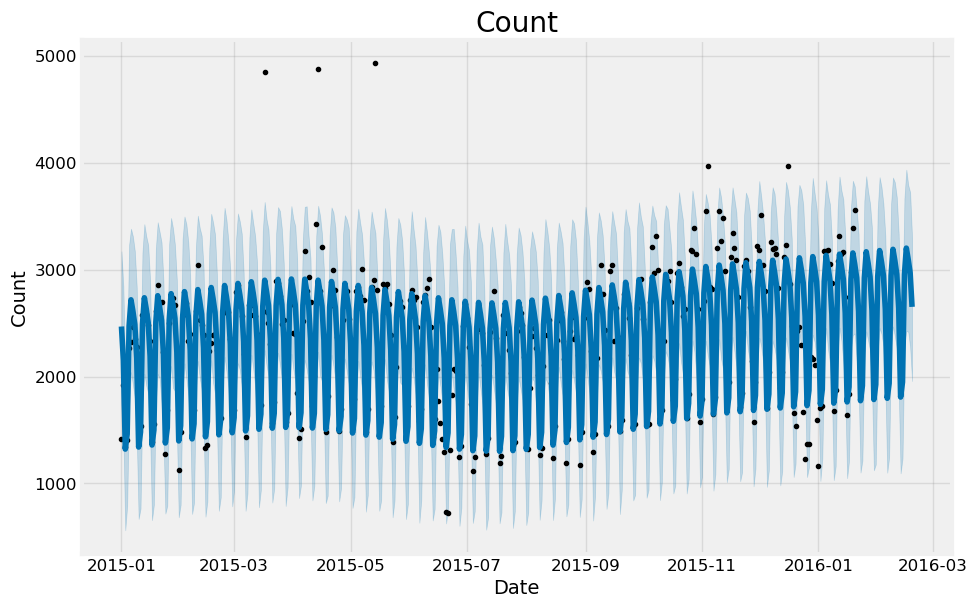

In [54]:
#plotting furniture forecast
plt.figure(figsize=(18, 6))
model.plot(forecast_prht, xlabel = 'Date', ylabel = 'Count')
plt.title('Count')
plt.show()

### Trend Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


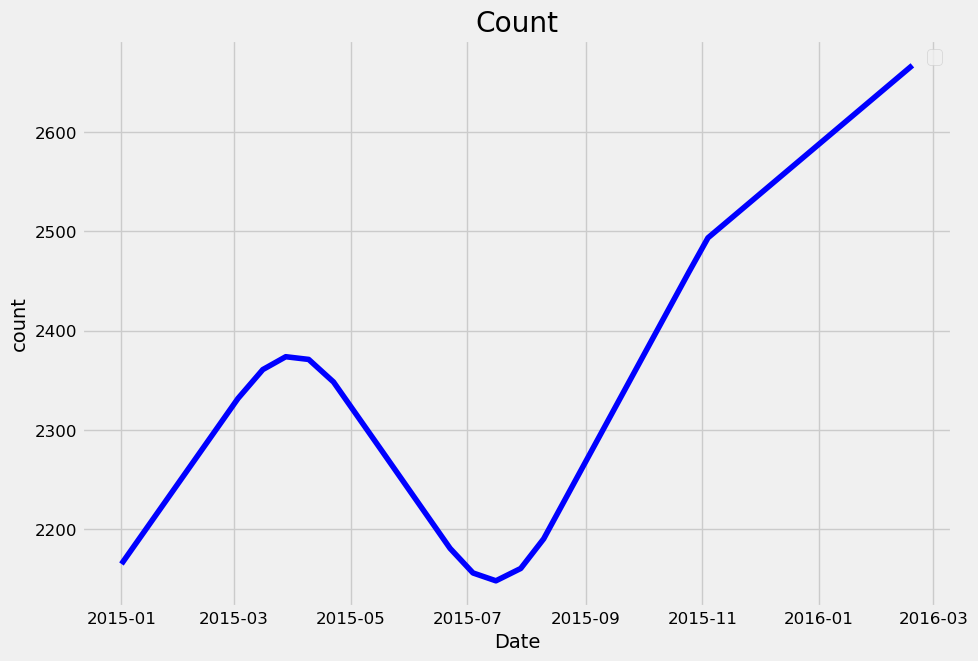

In [55]:
plt.figure(figsize=(10, 7))
plt.plot(forecast_prht['ds'], forecast_prht['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('count')
plt.title('Count');

### Plot Components of Time-series

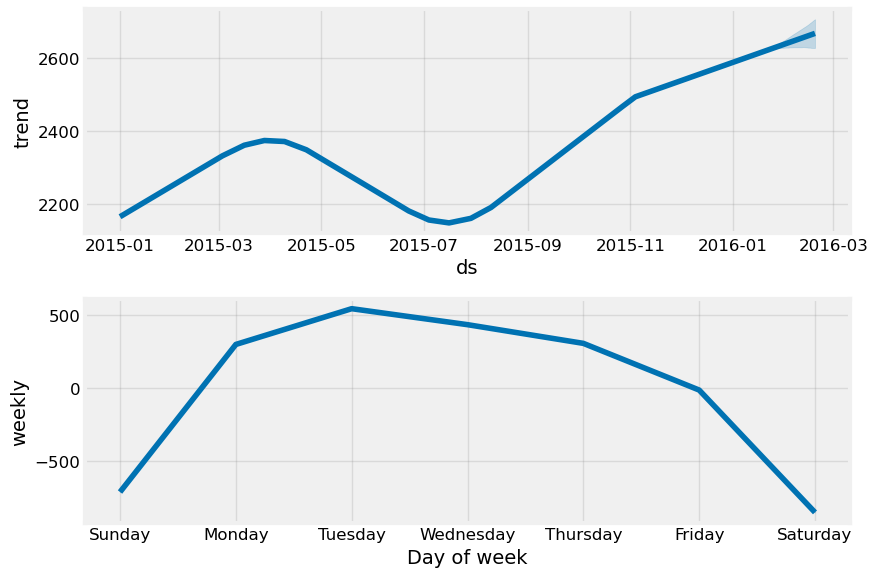

In [56]:
model.plot_components(forecast_prht)
plt.show()

### Modelin Diagnostik qrafikləri çıxarılır

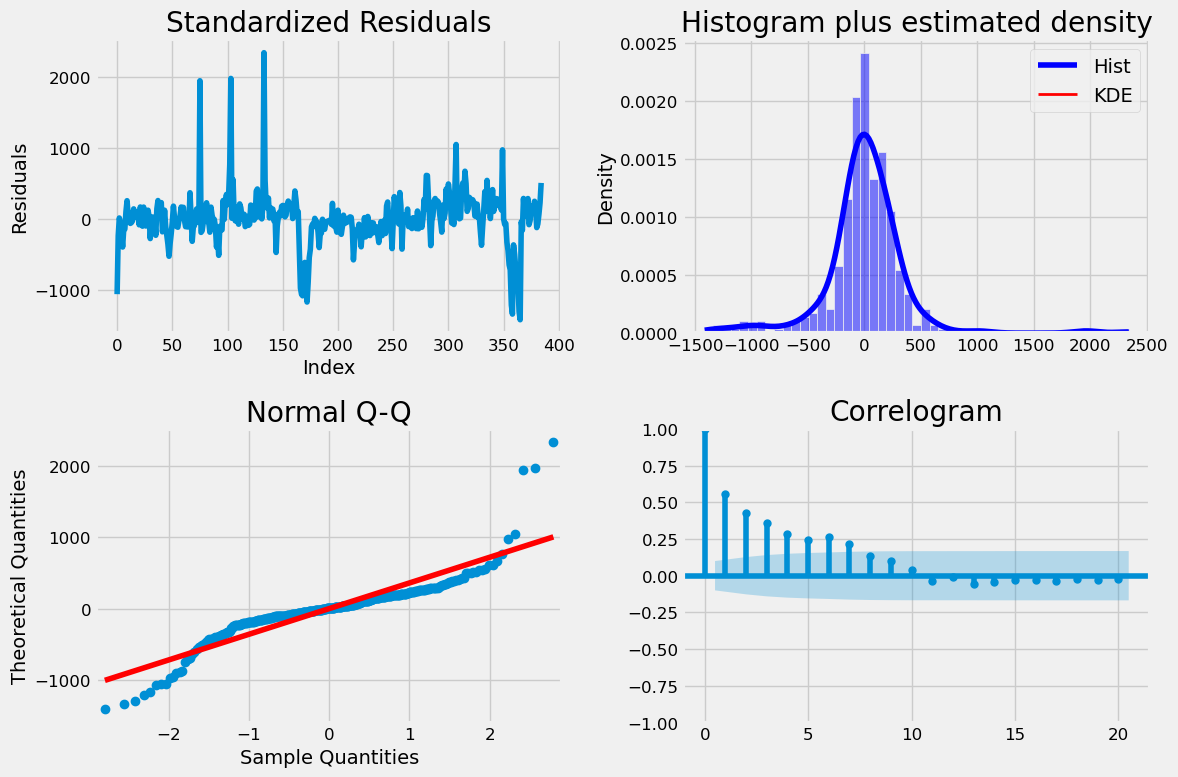

In [57]:
# Qalıqları hesablayın
residuals = df_prpht['y'] - forecast_prht['yhat'][:len(df_prpht)]

# Vizualizasiya üçün tərtibat
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standartlaşdırılmış qalıqlar
axs[0, 0].plot(residuals)
axs[0, 0].set_title('Standardized Residuals')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Residuals')

# 2. Histogram və KDE
sns.histplot(residuals, kde=True, ax=axs[0, 1], stat='density', color='blue')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].axhline(0, color='red', lw=2)
axs[0, 1].legend(['Hist', 'KDE'])

# 3. Q-Q Plot
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s', ax=axs[1, 0])  # line='s' xətdə qırmızı xətt çəkmək üçündür
axs[1, 0].set_title('Normal Q-Q')
axs[1, 0].set_xlabel('Sample Quantities')
axs[1, 0].set_ylabel('Theoretical Quantities')
plt.grid(True)


# 4. Korrelogram
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axs[1, 1], lags=20)
axs[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

### Proqnozdan sonra metrikləri əldə etmək:

In [58]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = df_prpht['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast_prht['yhat'][:len(df_prpht['y'])] # Proqnozlaşdırılan dəyərlər


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): 0.6989835492382666
Mean Absolute Error (MAE): 219.89129161265325
Mean Absolute Percentage Error (MAPE): 0.1028058357366754
Mean Squared Error (MSE): 130117.55501100603
Root Mean Squared Error (RMSE): 360.718110178857


### Difference show with Real and Pred

In [59]:
pd.DataFrame({'date': df_prpht.ds, 'real': y_true.values, 'frcst': y_pred.values, 
                                                      'diff': y_true.values - y_pred.values})

date    real        frcst         diff
0   2015-01-01  1414.0  2469.049209 -1055.049209
1   2015-01-02  1920.0  2153.406559  -233.406559
2   2015-01-03  1338.0  1321.781704    16.218296
3   2015-01-04  1404.0  1463.451789   -59.451789
4   2015-01-05  2264.0  2472.697351  -208.697351
..         ...     ...          ...          ...
380 2016-01-16  1644.0  1763.358862  -119.358862
381 2016-01-17  1836.0  1903.918937   -67.918937
382 2016-01-18  2983.0  2912.054487    70.945513
383 2016-01-19  3389.0  3157.451547   231.548453
384 2016-01-20  3559.0  3050.059030   508.940970

[385 rows x 4 columns]

### Time Series Modeling with Prophet vs ParameterGrid

In [60]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Selection Feature

In [61]:
df_prpht = copy.deepcopy(df)
df_prpht = df[['date', 'count']].rename(columns={"date": 'ds', "count": 'y'})
df_prpht

ds       y
0   2015-01-01  1414.0
1   2015-01-02  1920.0
2   2015-01-03  1338.0
3   2015-01-04  1404.0
4   2015-01-05  2264.0
..         ...     ...
380 2016-01-16  1644.0
381 2016-01-17  1836.0
382 2016-01-18  2983.0
383 2016-01-19  3389.0
384 2016-01-20  3559.0

[385 rows x 2 columns]

### ParameterGrid

In [62]:
from sklearn.model_selection import ParameterGrid

parameters = {
            "changepoint_prior_scale" : [0.1, 0.2],
            "n_changepoints" : [1, 5],
            "holidays_prior_scale" : [0.1, 0.2],
            "seasonality_mode" : ['multiplicative', 'additive']
            }

parameter_grid = ParameterGrid(parameters)

In [63]:
# Nəticələrin saxlanması üçün boş siyahı
parameter_list = []

# Model üçün təlim datanızın adı 'model_df' olmalıdır
# model_df DataFrame içində 'ds' sütunu (tarixlər) və 'y' sütunu (məqsəd dəyişəni) olmalıdır

for p in parameter_grid:
    print("Testing parameters:", p)
    
    # Prophet modeli qurmaq
    model = Prophet(
                    changepoint_prior_scale=p['changepoint_prior_scale'], 
                    n_changepoints=p['n_changepoints'],
                    holidays_prior_scale=p['holidays_prior_scale'], 
                    seasonality_mode=p['seasonality_mode'], 
                    interval_width=0.95
                    )
    
    # Modeli öyrətmək
    model.fit(df_prpht)
    
    # Gələcək üçün dataframe yaratmaq (100 gün irəliyə)
    future = model.make_future_dataframe(periods=300, freq='D')
    
    # Proqnoz yaratmaq
    forecast = model.predict(future)
    
    # Proqnozlanmış dəyərlərdən yalnız 'ds' və 'yhat' sütunlarını seçirik
    predicted = forecast[['ds', 'yhat']]
    
    # Əsl dəyərlər 'model_df' içində olmalıdır
    actual = df_prpht
    
    # MPE (Mean Percentage Error) hesablanması
    mpe = np.mean((predicted['yhat'].values[:len(actual['y'].values)] - actual['y'].values) / actual['y'].values)
    
    print("MPE:", mpe)
    
    # Hər parametri və onun MPE dəyərini siyahıya əlavə etmək
    parameter_list.append([mpe, p])

# Nəticələr siyahısı - hər parametr dəsti üçün MPE və parametrlər çap olunur
print(parameter_list)

Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}


11:16:46 - cmdstanpy - INFO - Chain [1] start processing
11:16:47 - cmdstanpy - INFO - Chain [1] done processing
11:16:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:16:47 - cmdstanpy - INFO - Chain [1] start processing
11:16:47 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.029576851625072904
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive'}


11:16:48 - cmdstanpy - INFO - Chain [1] start processing
11:16:48 - cmdstanpy - INFO - Chain [1] done processing
11:16:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:16:48 - cmdstanpy - INFO - Chain [1] start processing
11:16:49 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.0295647121845897
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}


11:16:50 - cmdstanpy - INFO - Chain [1] start processing
11:16:50 - cmdstanpy - INFO - Chain [1] done processing
11:16:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:16:50 - cmdstanpy - INFO - Chain [1] start processing
11:16:51 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.0232115219014447
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


11:16:52 - cmdstanpy - INFO - Chain [1] start processing
11:16:52 - cmdstanpy - INFO - Chain [1] done processing
11:16:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:16:52 - cmdstanpy - INFO - Chain [1] start processing
11:16:53 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.022499884258076867
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}


11:16:54 - cmdstanpy - INFO - Chain [1] start processing
11:16:54 - cmdstanpy - INFO - Chain [1] done processing
11:16:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:16:54 - cmdstanpy - INFO - Chain [1] start processing
11:16:55 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.029576851625072904
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive'}


11:16:56 - cmdstanpy - INFO - Chain [1] start processing
11:16:56 - cmdstanpy - INFO - Chain [1] done processing
11:16:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:16:56 - cmdstanpy - INFO - Chain [1] start processing
11:16:56 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.0295647121845897
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}


11:16:58 - cmdstanpy - INFO - Chain [1] start processing
11:16:58 - cmdstanpy - INFO - Chain [1] done processing
11:16:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:16:58 - cmdstanpy - INFO - Chain [1] start processing
11:16:59 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.0232115219014447
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


11:17:00 - cmdstanpy - INFO - Chain [1] start processing
11:17:00 - cmdstanpy - INFO - Chain [1] done processing
11:17:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:17:00 - cmdstanpy - INFO - Chain [1] start processing
11:17:01 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.022499884258076867
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}


11:17:02 - cmdstanpy - INFO - Chain [1] start processing
11:17:02 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.029574363601853663
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive'}


11:17:03 - cmdstanpy - INFO - Chain [1] start processing
11:17:03 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.029557434298239954
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}


11:17:04 - cmdstanpy - INFO - Chain [1] start processing
11:17:04 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.022158896334966153
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


11:17:05 - cmdstanpy - INFO - Chain [1] start processing
11:17:05 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.021200250130925816
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}


11:17:06 - cmdstanpy - INFO - Chain [1] start processing
11:17:07 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.029574363601853663
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive'}


11:17:08 - cmdstanpy - INFO - Chain [1] start processing
11:17:08 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.029557434298239954
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}


11:17:09 - cmdstanpy - INFO - Chain [1] start processing
11:17:09 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.022158896334966153
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


11:17:10 - cmdstanpy - INFO - Chain [1] start processing
11:17:10 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.021200250130925816
[[0.029576851625072904, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}], [0.0295647121845897, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive'}], [0.0232115219014447, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}], [0.022499884258076867, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive'}], [0.029576851625072904, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}], [0.0295647121845897, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive'}], [0.0232115219014447, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode

In [64]:
parameters_df = pd.DataFrame(parameter_list, columns=['MPE', 'P'])
parameters_df

MPE                                                  P
0   0.029577  {'changepoint_prior_scale': 0.1, 'holidays_pri...
1   0.029565  {'changepoint_prior_scale': 0.1, 'holidays_pri...
2   0.023212  {'changepoint_prior_scale': 0.1, 'holidays_pri...
3   0.022500  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4   0.029577  {'changepoint_prior_scale': 0.1, 'holidays_pri...
5   0.029565  {'changepoint_prior_scale': 0.1, 'holidays_pri...
6   0.023212  {'changepoint_prior_scale': 0.1, 'holidays_pri...
7   0.022500  {'changepoint_prior_scale': 0.1, 'holidays_pri...
8   0.029574  {'changepoint_prior_scale': 0.2, 'holidays_pri...
9   0.029557  {'changepoint_prior_scale': 0.2, 'holidays_pri...
10  0.022159  {'changepoint_prior_scale': 0.2, 'holidays_pri...
11  0.021200  {'changepoint_prior_scale': 0.2, 'holidays_pri...
12  0.029574  {'changepoint_prior_scale': 0.2, 'holidays_pri...
13  0.029557  {'changepoint_prior_scale': 0.2, 'holidays_pri...
14  0.022159  {'changepoint_prior_scale': 0.2, 'holidays_pri...
15  0.021200  {'changepoint_prior_scale': 0.2, 'holidays_pri...

In [65]:
parameters_df = parameters_df.sort_values(by='MPE')
parameters_df

MPE                                                  P
11  0.021200  {'changepoint_prior_scale': 0.2, 'holidays_pri...
15  0.021200  {'changepoint_prior_scale': 0.2, 'holidays_pri...
10  0.022159  {'changepoint_prior_scale': 0.2, 'holidays_pri...
14  0.022159  {'changepoint_prior_scale': 0.2, 'holidays_pri...
3   0.022500  {'changepoint_prior_scale': 0.1, 'holidays_pri...
7   0.022500  {'changepoint_prior_scale': 0.1, 'holidays_pri...
2   0.023212  {'changepoint_prior_scale': 0.1, 'holidays_pri...
6   0.023212  {'changepoint_prior_scale': 0.1, 'holidays_pri...
9   0.029557  {'changepoint_prior_scale': 0.2, 'holidays_pri...
13  0.029557  {'changepoint_prior_scale': 0.2, 'holidays_pri...
1   0.029565  {'changepoint_prior_scale': 0.1, 'holidays_pri...
5   0.029565  {'changepoint_prior_scale': 0.1, 'holidays_pri...
8   0.029574  {'changepoint_prior_scale': 0.2, 'holidays_pri...
12  0.029574  {'changepoint_prior_scale': 0.2, 'holidays_pri...
0   0.029577  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4   0.029577  {'changepoint_prior_scale': 0.1, 'holidays_pri...

In [66]:
print("Lowest MPE: ", parameters_df.iloc[0, 0]) 
print("Parameters: ", parameters_df.iloc[0, 1])

Lowest MPE:  0.021200250130925816
Parameters:  {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


### Creat Model Prophet with Best Parameters

In [67]:
from prophet import Prophet

model = Prophet(changepoint_prior_scale = 0.2,
                holidays_prior_scale = 0.1,
                n_changepoints = 5,
                seasonality_mode = 'additive',
                interval_width =0.95)
model.fit(df_prpht)

11:17:12 - cmdstanpy - INFO - Chain [1] start processing
11:17:12 - cmdstanpy - INFO - Chain [1] done processing


### Forecast

In [68]:
future = model.make_future_dataframe (periods = 30, freq='D')
forecast_prht = model.predict(future)
forecast_prht[['ds', 'yhat', 'trend', 'yhat_lower', 'yhat_upper']]

ds         yhat        trend   yhat_lower   yhat_upper
0   2015-01-01  2417.890313  2114.831736  1747.077599  3089.105980
1   2015-01-02  2103.480024  2118.345799  1458.761957  2739.113708
2   2015-01-03  1273.076473  2121.859862   589.945950  1889.629423
3   2015-01-04  1415.652172  2125.373925   750.950549  2090.222439
4   2015-01-05  2425.772527  2128.887987  1729.459196  3039.878807
..         ...          ...          ...          ...          ...
410 2016-02-15  2657.116308  2360.231769  1980.254058  3353.581087
411 2016-02-16  2898.222900  2357.192001  2214.370506  3604.448094
412 2016-02-17  2786.549135  2354.152234  2145.847188  3504.494843
413 2016-02-18  2654.171043  2351.112466  1953.489129  3354.117701
414 2016-02-19  2333.206923  2348.072699  1611.116995  2997.721905

[415 rows x 5 columns]

In [69]:
forecast_prht[['ds', 'yhat', 'trend', 'yhat_lower', 'yhat_upper']][-30:].head()

ds         yhat        trend   yhat_lower   yhat_upper
385 2016-01-21  2739.284535  2436.225958  2065.995328  3378.024039
386 2016-01-22  2418.320415  2433.186190  1786.878789  3070.831463
387 2016-01-23  1581.363034  2430.146423   901.666021  2226.459359
388 2016-01-24  1717.384903  2427.106655  1036.408643  2480.456997
389 2016-01-25  2720.951427  2424.066888  2038.124262  3424.508830

### Plotting  Forecast

<Figure size 1800x600 with 0 Axes>

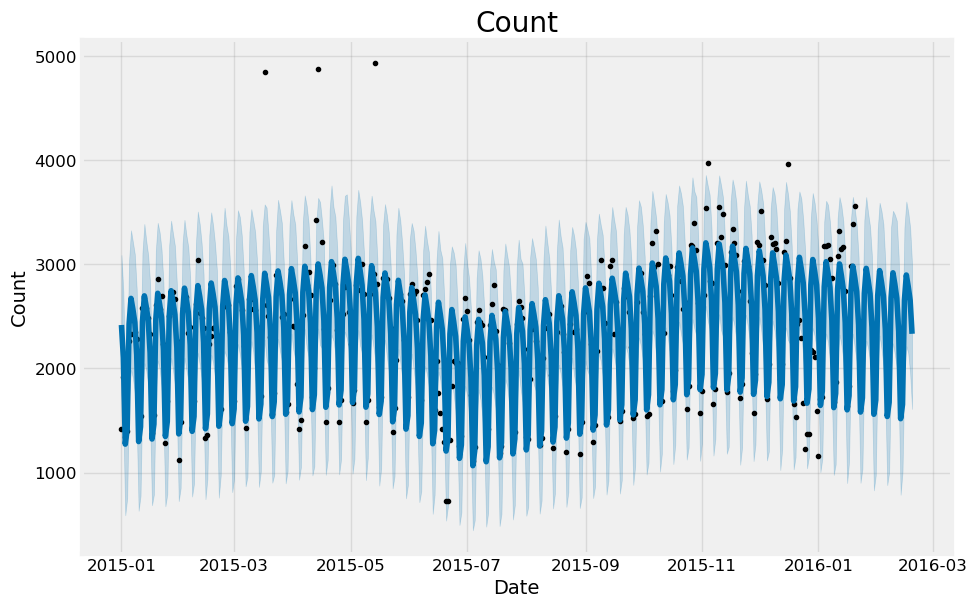

In [70]:
#plotting furniture forecast
plt.figure(figsize=(18, 6))
model.plot(forecast_prht, xlabel = 'Date', ylabel = 'Count')
plt.title('Count')
plt.show()

### Trend Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


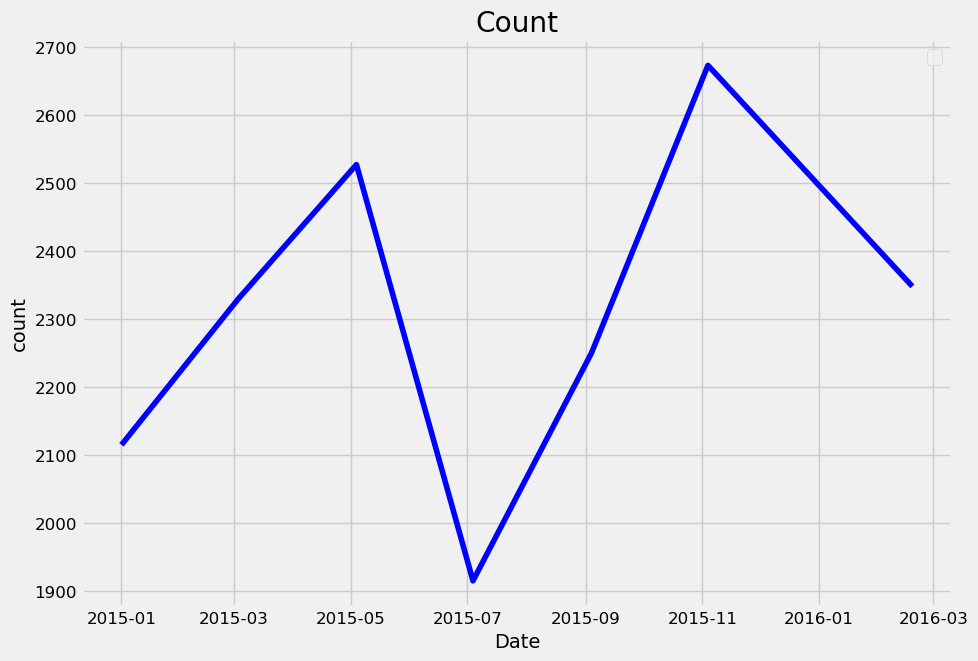

In [71]:
plt.figure(figsize=(10, 7))
plt.plot(forecast_prht['ds'], forecast_prht['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('count')
plt.title('Count');

### Plot Components of Time-series

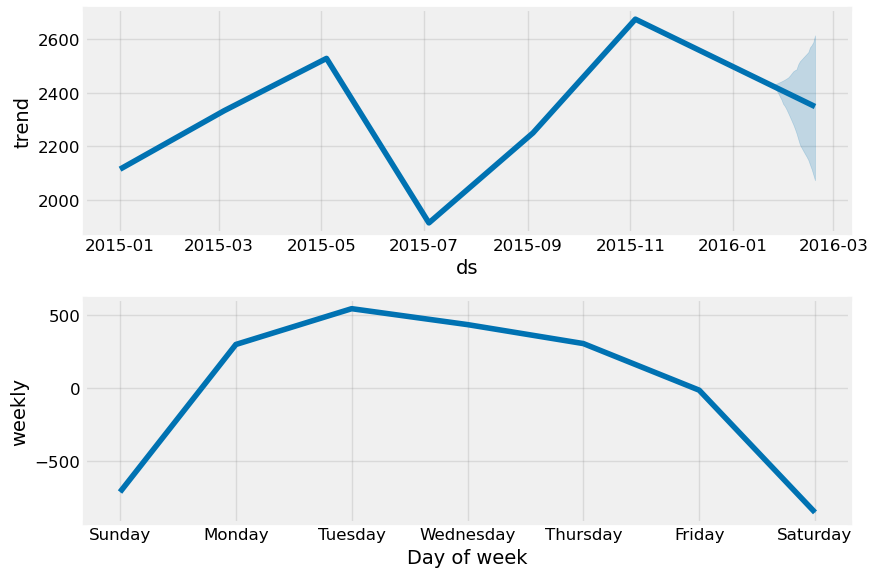

In [72]:
model.plot_components(forecast_prht)
plt.show()

### Modelin Diagnostik qrafikləri çıxarılır

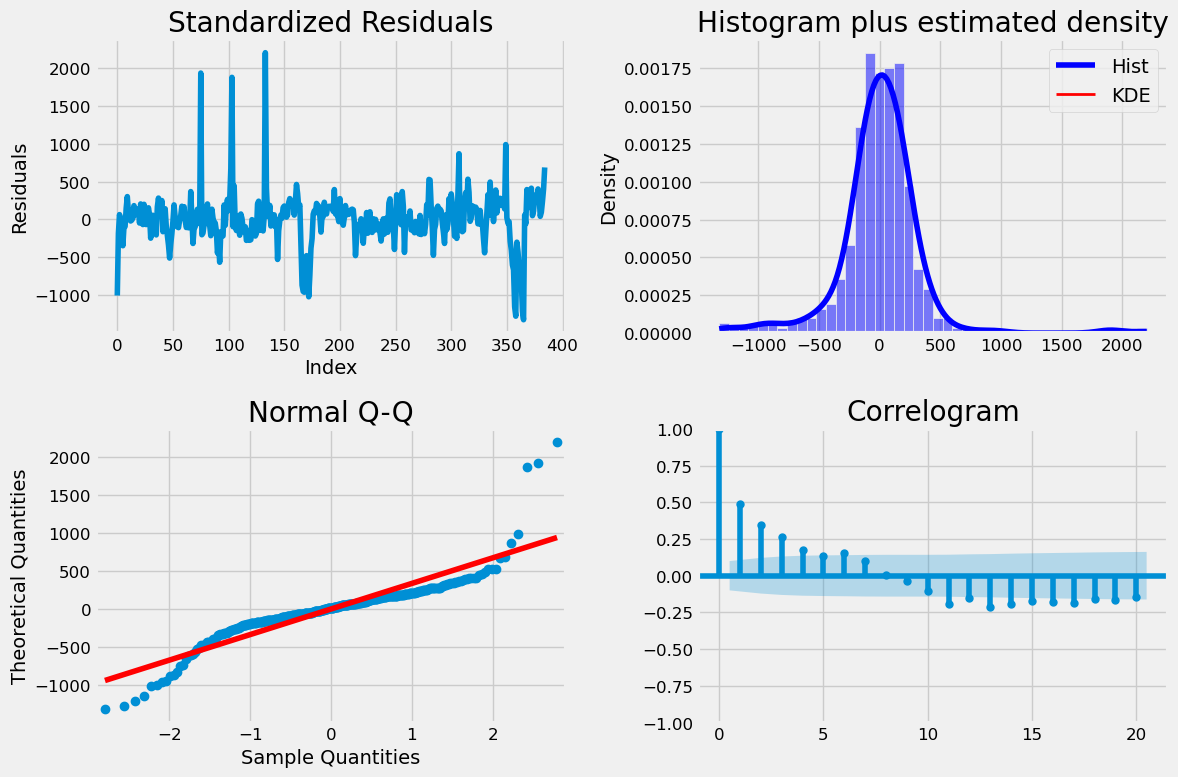

In [73]:
# Qalıqları hesablayın
residuals = df_prpht['y'] - forecast_prht['yhat'][:len(df_prpht)]

# Vizualizasiya üçün tərtibat
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standartlaşdırılmış qalıqlar
axs[0, 0].plot(residuals)
axs[0, 0].set_title('Standardized Residuals')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Residuals')

# 2. Histogram və KDE
sns.histplot(residuals, kde=True, ax=axs[0, 1], stat='density', color='blue')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].axhline(0, color='red', lw=2)
axs[0, 1].legend(['Hist', 'KDE'])

# 3. Q-Q Plot
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s', ax=axs[1, 0])  # line='s' xətdə qırmızı xətt çəkmək üçündür
axs[1, 0].set_title('Normal Q-Q')
axs[1, 0].set_xlabel('Sample Quantities')
axs[1, 0].set_ylabel('Theoretical Quantities')
plt.grid(True)


# 4. Korrelogram
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axs[1, 1], lags=20)
axs[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

### Proqnozdan sonra metrikləri əldə etmək:

In [74]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = df_prpht['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast_prht['yhat'][:len(df_prpht['y'])] # Proqnozlaşdırılan dəyərlər


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): 0.7362937627858135
Mean Absolute Error (MAE): 211.53581303363907
Mean Absolute Percentage Error (MAPE): 0.0978743742027118
Mean Squared Error (MSE): 113989.81929603002
Root Mean Squared Error (RMSE): 337.62378366464355


### Difference show with Real and Pred

In [75]:
pd.DataFrame({'date': df_prpht.ds, 'real': y_true.values, 'frcst': y_pred.values, 
                                                      'diff': y_true.values - y_pred.values})

date    real        frcst         diff
0   2015-01-01  1414.0  2417.890313 -1003.890313
1   2015-01-02  1920.0  2103.480024  -183.480024
2   2015-01-03  1338.0  1273.076473    64.923527
3   2015-01-04  1404.0  1415.652172   -11.652172
4   2015-01-05  2264.0  2425.772527  -161.772527
..         ...     ...          ...          ...
380 2016-01-16  1644.0  1602.641406    41.358594
381 2016-01-17  1836.0  1738.663276    97.336724
382 2016-01-18  2983.0  2742.229800   240.770200
383 2016-01-19  3389.0  2983.336392   405.663608
384 2016-01-20  3559.0  2871.662627   687.337373

[385 rows x 4 columns]

## Time Series Modeling with Prophet vs BayesianOptimization

In [76]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Selection Feature

In [77]:
df_byopt = copy.deepcopy(df)
df_byopt = df[['date', 'count']].rename(columns={"date": 'ds', "count": 'y'})
df_byopt

ds       y
0   2015-01-01  1414.0
1   2015-01-02  1920.0
2   2015-01-03  1338.0
3   2015-01-04  1404.0
4   2015-01-05  2264.0
..         ...     ...
380 2016-01-16  1644.0
381 2016-01-17  1836.0
382 2016-01-18  2983.0
383 2016-01-19  3389.0
384 2016-01-20  3559.0

[385 rows x 2 columns]

### BayesianOptimization

In [78]:
# !pip install bayesian-optimization 

In [79]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from bayes_opt import BayesianOptimization

# Modelin optimizasiyası üçün funksiya təyin edir
def optimization_function(changepoint_prior_scale, n_changepoints, holidays_prior_scale, seasonality_mode):
    
    # seasonality_mode ədədi dəyərini müvafiq mətn formatına çevir
    if seasonality_mode == 0:
        seasonality_mode_str = 'additive'
    else:
        seasonality_mode_str = 'multiplicative'
    
    model = Prophet(changepoint_prior_scale=changepoint_prior_scale, 
                    n_changepoints=int(n_changepoints),
                    holidays_prior_scale=holidays_prior_scale,
                    seasonality_mode=seasonality_mode_str)  # Prophet mdelini qurur
    
    model.fit(df_byopt)  # Məlumatı modelə uyğunlaşdırır
    
    # Modeli cross-validation metodundan keçirir
    cross_val = cross_validation(model, horizon='30 days', parallel='processes')
    
    # Cross-validation nəticələrinə əsasən performans metriklərini hesablayır
    perf_m = performance_metrics(cross_val, rolling_window=1)

    # RMSE dəyərini qaytarır
    rmse = (perf_m['rmse'].values[0])
    
    return -rmse  # Bayes optimizasiyası minimallaşdırmağa çalışır, ona görə -RMSE qaytarır

# Optimizasiya parametrlərini təyin edin
parameters = {
            "changepoint_prior_scale" : [0.1, 0.2],
            "n_changepoints" : [1, 5],
            "holidays_prior_scale" : [0.1, 0.2],
#             "seasonality_mode" : ['multiplicative', 'additive']
            "seasonality_mode": (0, 1)  # 0: additive, 1: multiplicative
            }

# BayesianOptimization obyektini yaradın
optimizer = BayesianOptimization(
    f=optimization_function,  # Optimizasiya ediləcək funksiya
    pbounds=parameters,  # Parametrlərin aralığı
    random_state=42  # Təsadüfi vəziyyət
)

# Optimizasiyanı yerinə yetirin
optimizer.maximize(
    init_points=5,  # Başlanğıc nöqtələrinin sayı
    n_iter=20,  # İterasiya sayısı
)

# Nəticələri çap edin
print(optimizer.max)  # Ən yaxşı tapılan dəyəri göstərir

|   iter    |  target   | change... | holida... | n_chan... | season... |
-------------------------------------------------------------------------


11:17:25 - cmdstanpy - INFO - Chain [1] start processing
11:17:25 - cmdstanpy - INFO - Chain [1] done processing


| 1         | -514.7    | 0.1375    | 0.1951    | 3.928     | 0.5987    |


11:17:34 - cmdstanpy - INFO - Chain [1] start processing
11:17:34 - cmdstanpy - INFO - Chain [1] done processing
11:17:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:17:34 - cmdstanpy - INFO - Chain [1] start processing
11:17:34 - cmdstanpy - INFO - Chain [1] done processing


| 2         | -550.9    | 0.1156    | 0.1156    | 1.232     | 0.8662    |


11:17:40 - cmdstanpy - INFO - Chain [1] start processing
11:17:40 - cmdstanpy - INFO - Chain [1] done processing


| 3         | -557.9    | 0.1601    | 0.1708    | 1.082     | 0.9699    |


11:17:45 - cmdstanpy - INFO - Chain [1] start processing
11:17:45 - cmdstanpy - INFO - Chain [1] done processing


| 4         | -560.9    | 0.1832    | 0.1212    | 1.727     | 0.1834    |


11:17:51 - cmdstanpy - INFO - Chain [1] start processing
11:17:51 - cmdstanpy - INFO - Chain [1] done processing


| 5         | -543.4    | 0.1304    | 0.1525    | 2.728     | 0.2912    |


11:18:20 - cmdstanpy - INFO - Chain [1] start processing
11:18:20 - cmdstanpy - INFO - Chain [1] done processing


| 6         | -513.1    | 0.1       | 0.1763    | 3.896     | 0.176     |


11:18:30 - cmdstanpy - INFO - Chain [1] start processing
11:18:30 - cmdstanpy - INFO - Chain [1] done processing
11:18:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:18:30 - cmdstanpy - INFO - Chain [1] start processing
11:18:30 - cmdstanpy - INFO - Chain [1] done processing


| 7         | -516.8    | 0.1       | 0.1738    | 4.689     | 0.2539    |


11:18:39 - cmdstanpy - INFO - Chain [1] start processing
11:18:39 - cmdstanpy - INFO - Chain [1] done processing


| 8         | -518.2    | 0.2       | 0.1       | 5.0       | 1.0       |


11:18:46 - cmdstanpy - INFO - Chain [1] start processing
11:18:46 - cmdstanpy - INFO - Chain [1] done processing
11:18:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:18:46 - cmdstanpy - INFO - Chain [1] start processing
11:18:46 - cmdstanpy - INFO - Chain [1] done processing


| 9         | -516.8    | 0.1       | 0.1       | 4.37      | 1.0       |


11:18:56 - cmdstanpy - INFO - Chain [1] start processing
11:18:56 - cmdstanpy - INFO - Chain [1] done processing


| 10        | -513.1    | 0.1       | 0.1       | 3.372     | 1.0       |


11:19:06 - cmdstanpy - INFO - Chain [1] start processing
11:19:06 - cmdstanpy - INFO - Chain [1] done processing


| 11        | -512.0    | 0.2       | 0.1       | 5.0       | 0.0       |


11:19:16 - cmdstanpy - INFO - Chain [1] start processing
11:19:16 - cmdstanpy - INFO - Chain [1] done processing


| 12        | -508.0    | 0.2       | 0.1       | 4.304     | 0.0       |


11:19:22 - cmdstanpy - INFO - Chain [1] start processing
11:19:22 - cmdstanpy - INFO - Chain [1] done processing


| 13        | -517.5    | 0.2       | 0.1       | 3.784     | 1.0       |


11:19:28 - cmdstanpy - INFO - Chain [1] start processing
11:19:28 - cmdstanpy - INFO - Chain [1] done processing


| 14        | -538.4    | 0.1       | 0.2       | 2.719     | 1.0       |


11:19:35 - cmdstanpy - INFO - Chain [1] start processing
11:19:35 - cmdstanpy - INFO - Chain [1] done processing


| 15        | -512.0    | 0.2       | 0.1       | 3.527     | 0.0       |


11:19:46 - cmdstanpy - INFO - Chain [1] start processing
11:19:46 - cmdstanpy - INFO - Chain [1] done processing


| 16        | -517.5    | 0.2       | 0.1       | 3.471     | 0.5174    |


11:19:56 - cmdstanpy - INFO - Chain [1] start processing
11:19:57 - cmdstanpy - INFO - Chain [1] done processing


| 17        | -512.0    | 0.2       | 0.1       | 3.96      | 0.0       |


11:20:07 - cmdstanpy - INFO - Chain [1] start processing
11:20:08 - cmdstanpy - INFO - Chain [1] done processing


| 18        | -508.0    | 0.2       | 0.2       | 4.573     | 0.0       |


11:20:18 - cmdstanpy - INFO - Chain [1] start processing
11:20:18 - cmdstanpy - INFO - Chain [1] done processing
11:20:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:20:18 - cmdstanpy - INFO - Chain [1] start processing
11:20:19 - cmdstanpy - INFO - Chain [1] done processing


| 19        | -512.8    | 0.1       | 0.1       | 4.544     | 0.0       |


11:20:31 - cmdstanpy - INFO - Chain [1] start processing
11:20:31 - cmdstanpy - INFO - Chain [1] done processing


| 20        | -513.1    | 0.2       | 0.2       | 4.279     | 0.2894    |


11:20:41 - cmdstanpy - INFO - Chain [1] start processing
11:20:41 - cmdstanpy - INFO - Chain [1] done processing
11:20:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:20:41 - cmdstanpy - INFO - Chain [1] start processing
11:20:42 - cmdstanpy - INFO - Chain [1] done processing


| 21        | -512.8    | 0.1       | 0.2       | 4.242     | 0.0       |


11:20:52 - cmdstanpy - INFO - Chain [1] start processing
11:20:53 - cmdstanpy - INFO - Chain [1] done processing


| 22        | -518.2    | 0.2       | 0.2       | 5.0       | 0.505     |


11:21:05 - cmdstanpy - INFO - Chain [1] start processing
11:21:05 - cmdstanpy - INFO - Chain [1] done processing


| 23        | -510.7    | 0.1       | 0.2       | 3.565     | 0.0       |


11:21:14 - cmdstanpy - INFO - Chain [1] start processing
11:21:14 - cmdstanpy - INFO - Chain [1] done processing


| 24        | -508.0    | 0.2       | 0.1       | 4.675     | 0.0       |


11:21:24 - cmdstanpy - INFO - Chain [1] start processing
11:21:24 - cmdstanpy - INFO - Chain [1] done processing


| 25        | -508.0    | 0.2       | 0.1       | 4.482     | 0.0       |
{'target': -508.02273832869355, 'params': {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 4.303545978430463, 'seasonality_mode': 0.0}}


### Creat Model Prophet with Best Parameters

In [80]:
from prophet import Prophet

model = Prophet(changepoint_prior_scale = 0.2,
                holidays_prior_scale = 0.1,
                n_changepoints = 4,
                seasonality_mode = 'additive',
                interval_width =0.95)
model.fit(df_byopt)

11:21:30 - cmdstanpy - INFO - Chain [1] start processing
11:21:30 - cmdstanpy - INFO - Chain [1] done processing


### Forecast

In [81]:
future = model.make_future_dataframe (periods = 30, freq='D')
forecast_byopt = model.predict(future)
forecast_byopt[['ds', 'yhat', 'trend', 'yhat_lower', 'yhat_upper']]

ds         yhat        trend   yhat_lower   yhat_upper
0   2015-01-01  2370.861227  2067.602904  1674.737256  3059.494313
1   2015-01-02  2057.962506  2072.822270  1368.147920  2785.463006
2   2015-01-03  1229.083430  2078.041636   546.838304  1966.305753
3   2015-01-04  1373.496308  2083.261002   739.788975  2097.411367
4   2015-01-05  2385.480751  2088.480368  1707.620963  3002.144581
..         ...          ...          ...          ...          ...
410 2016-02-15  2625.063820  2328.063437  1831.983413  3351.044295
411 2016-02-16  2865.418593  2324.377770  2120.828245  3592.019325
412 2016-02-17  2752.975239  2320.692103  2050.880309  3484.866612
413 2016-02-18  2620.264759  2317.006436  1864.257774  3393.652018
414 2016-02-19  2298.461005  2313.320770  1548.545656  3007.377689

[415 rows x 5 columns]

In [82]:
forecast_byopt[['ds', 'yhat', 'trend', 'yhat_lower', 'yhat_upper']][-30:].head()

ds         yhat        trend   yhat_lower   yhat_upper
385 2016-01-21  2723.463433  2420.205110  2054.773832  3391.928121
386 2016-01-22  2401.659679  2416.519443  1716.815432  3098.561599
387 2016-01-23  1563.875570  2412.833776   877.278354  2217.067547
388 2016-01-24  1699.383415  2409.148109  1052.648821  2395.112216
389 2016-01-25  2702.462825  2405.462442  2008.405399  3354.692284

### Plotting Forecast

<Figure size 1800x600 with 0 Axes>

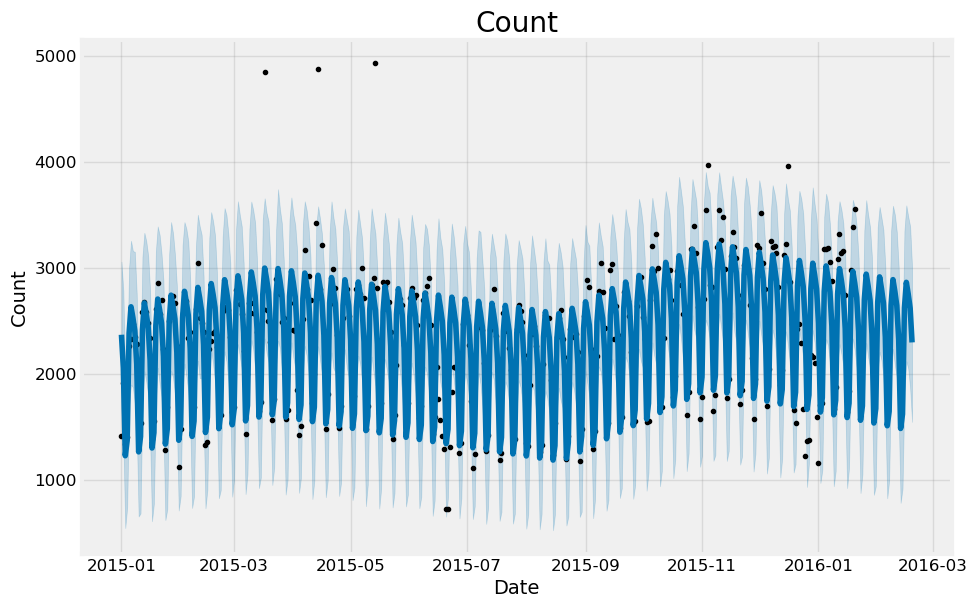

In [83]:
#plotting future forecast
plt.figure(figsize=(18, 6))
model.plot(forecast_byopt, xlabel = 'Date', ylabel = 'Count')
plt.title('Count')
plt.show()

### Trend Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


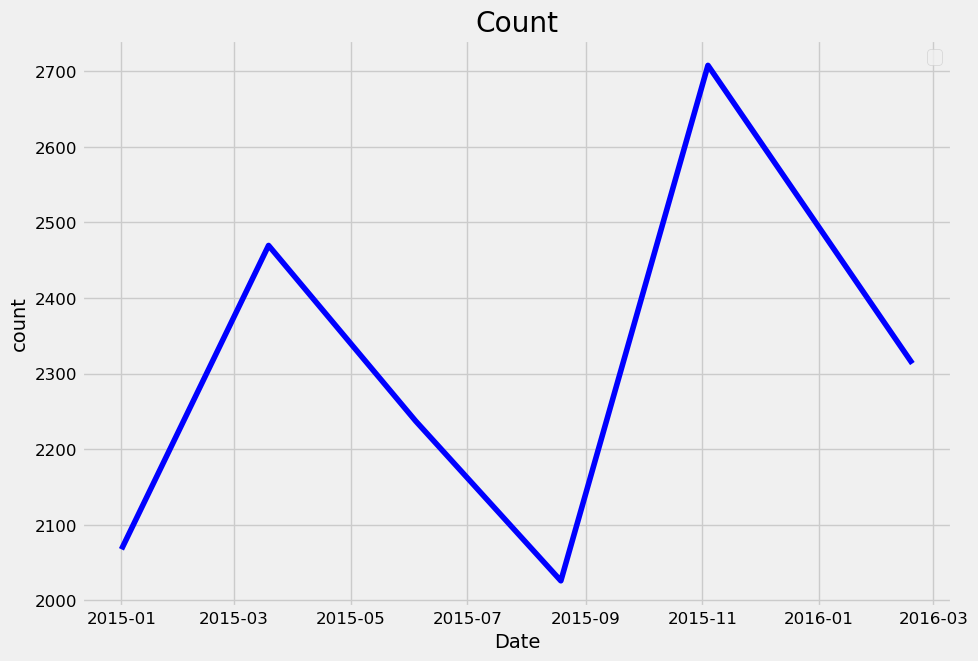

In [84]:
plt.figure(figsize=(10, 7))
plt.plot(forecast_byopt['ds'], forecast_byopt['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('count')
plt.title('Count');

### Plot Components of Time-series

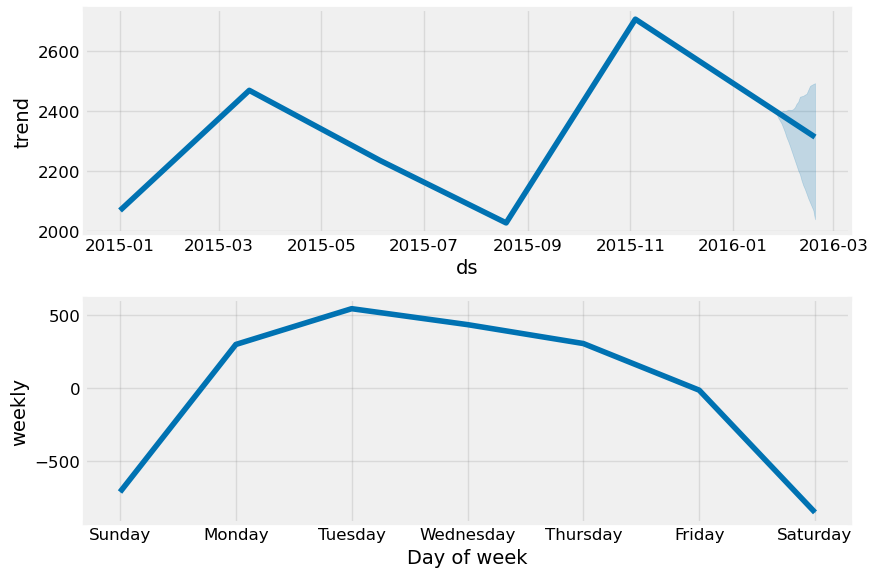

In [85]:
model.plot_components(forecast_byopt)
plt.show()

### Modelin Diagnostik qrafikləri çıxarılır

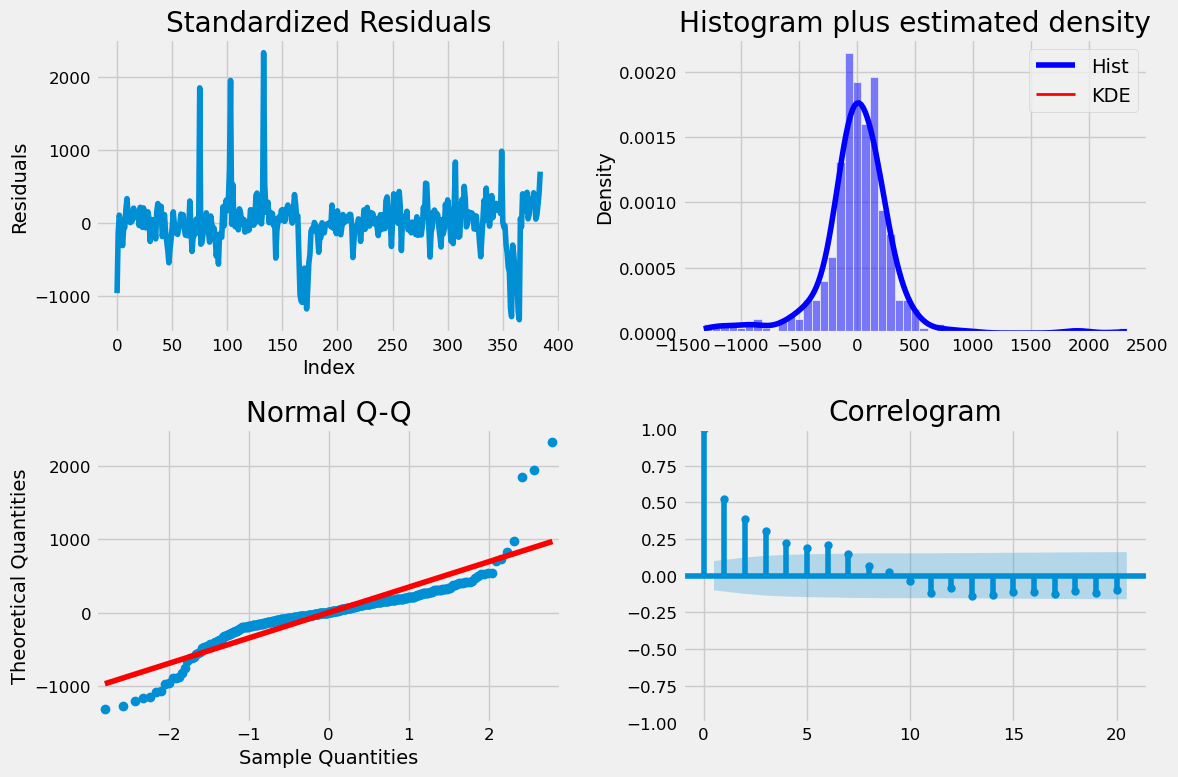

In [86]:
# Qalıqları hesablayın
residuals = df_byopt['y'] - forecast_byopt['yhat'][:len(df_byopt)]

# Vizualizasiya üçün tərtibat
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standartlaşdırılmış qalıqlar
axs[0, 0].plot(residuals)
axs[0, 0].set_title('Standardized Residuals')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Residuals')

# 2. Histogram və KDE
sns.histplot(residuals, kde=True, ax=axs[0, 1], stat='density', color='blue')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].axhline(0, color='red', lw=2)
axs[0, 1].legend(['Hist', 'KDE'])

# 3. Q-Q Plot
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s', ax=axs[1, 0])  # line='s' xətdə qırmızı xətt çəkmək üçündür
axs[1, 0].set_title('Normal Q-Q')
axs[1, 0].set_xlabel('Sample Quantities')
axs[1, 0].set_ylabel('Theoretical Quantities')
plt.grid(True)


# 4. Korrelogram
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axs[1, 1], lags=20)
axs[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

### Proqnozdan sonra metrikləri əldə etmək:

In [87]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = df_byopt['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast_byopt['yhat'][:len(df_byopt['y'])] # Proqnozlaşdırılan dəyərlər


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): 0.7203226382892325
Mean Absolute Error (MAE): 212.36949854767062
Mean Absolute Percentage Error (MAPE): 0.09919064370553753
Mean Squared Error (MSE): 120893.50733371943
Root Mean Squared Error (RMSE): 347.6974364784984


### Difference show with Real and Pred

In [88]:
pd.DataFrame({'date': df_byopt.ds, 'real': y_true.values, 'frcst': y_pred.values, 
                                                      'diff': y_true.values - y_pred.values})

date    real        frcst        diff
0   2015-01-01  1414.0  2370.861227 -956.861227
1   2015-01-02  1920.0  2057.962506 -137.962506
2   2015-01-03  1338.0  1229.083430  108.916570
3   2015-01-04  1404.0  1373.496308   30.503692
4   2015-01-05  2264.0  2385.480751 -121.480751
..         ...     ...          ...         ...
380 2016-01-16  1644.0  1589.675238   54.324762
381 2016-01-17  1836.0  1725.183083  110.816917
382 2016-01-18  2983.0  2728.262493  254.737507
383 2016-01-19  3389.0  2968.617267  420.382733
384 2016-01-20  3559.0  2856.173912  702.826088

[385 rows x 4 columns]

## Time-series modeling with NeuralProphet

In [89]:
# !pip install neuralprophet

In [90]:
# !pip install plotly-resampler

In [91]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Selection Feature

In [92]:
df_neupt = copy.deepcopy(df)
df_neupt = df[['date', 'count']].rename(columns={"date": 'ds', "count": 'y'})
df_neupt

ds       y
0   2015-01-01  1414.0
1   2015-01-02  1920.0
2   2015-01-03  1338.0
3   2015-01-04  1404.0
4   2015-01-05  2264.0
..         ...     ...
380 2016-01-16  1644.0
381 2016-01-17  1836.0
382 2016-01-18  2983.0
383 2016-01-19  3389.0
384 2016-01-20  3559.0

[385 rows x 2 columns]

### Find Best Learning Rate

In [93]:
# !pip install optuna

In [94]:
from neuralprophet import NeuralProphet
import optuna

def objective(trial):
    model = NeuralProphet(
    # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
    growth="linear",
    # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
    changepoints=None,
    # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
    n_changepoints=5,
    # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
    changepoints_range=0.8,
    # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
    trend_reg=0,
    # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
    trend_reg_threshold=False,
    # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    yearly_seasonality="auto",
    # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    weekly_seasonality="auto",
    # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    daily_seasonality="auto",
    # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
    seasonality_mode="additive",
    # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
    seasonality_reg=0,
    # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
    n_forecasts=1,
    # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
    n_lags=0,
    # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
    loss_func="Huber",
    # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
    normalize="auto",
    # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
    impute_missing=True
    # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
#   num_hidden_layers=0,
    # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
#   d_hidden=None,     
    # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
#   ar_sparsity=None,  
)
    lr = trial.suggest_loguniform('learning_rate', 0.001, 0.9)
    
    # Learning rate dəyərini çap edir
    print(f"Current trial learning rate: {lr}")    

    # Modeli fit edirik
    metrics = model.fit(df_neupt, learning_rate=lr, epochs=40, freq="D")

    if len(metrics['Loss']) > 0:
        return metrics['Loss'].iloc[-1]
    else:
        raise ValueError("Loss seriyası boşdur.")

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print("Best learning rate: ", study.best_params)

[I 2024-10-29 11:22:36,794] A new study created in memory with name: no-name-61cf176e-1a6f-46c8-b966-f86ce471c08e
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.74% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


Current trial learning rate: 0.0069471515423759934


INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 11:23:18,224] Trial 0 finished with value: 0.0315873809158802 and parameters: {'learning_rate': 0.0069471515423759934}. Best is trial 0 with value: 0.0315873809158802.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.74% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.013802150795996476


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 11:23:49,738] Trial 1 finished with value: 0.03268682584166527 and parameters: {'learning_rate': 0.013802150795996476}. Best is trial 0 with value: 0.0315873809158802.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.74% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.0029529548336204216


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 11:24:24,889] Trial 2 finished with value: 0.0547364316880703 and parameters: {'learning_rate': 0.0029529548336204216}. Best is trial 0 with value: 0.0315873809158802.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.74% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.0025249090749256504


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 11:25:00,596] Trial 3 finished with value: 0.39795970916748047 and parameters: {'learning_rate': 0.0025249090749256504}. Best is trial 0 with value: 0.0315873809158802.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.74% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.0010551041051467614


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 11:25:33,586] Trial 4 finished with value: 0.05773293599486351 and parameters: {'learning_rate': 0.0010551041051467614}. Best is trial 0 with value: 0.0315873809158802.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.74% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.0029199941427964357


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 11:26:06,754] Trial 5 finished with value: 0.029035134240984917 and parameters: {'learning_rate': 0.0029199941427964357}. Best is trial 5 with value: 0.029035134240984917.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.74% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.007655491352162202


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 11:26:40,927] Trial 6 finished with value: 0.03885633125901222 and parameters: {'learning_rate': 0.007655491352162202}. Best is trial 5 with value: 0.029035134240984917.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.74% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.0027295049958493967


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 11:27:13,625] Trial 7 finished with value: 0.1445963978767395 and parameters: {'learning_rate': 0.0027295049958493967}. Best is trial 5 with value: 0.029035134240984917.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.74% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.3223346617860439


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 11:27:45,938] Trial 8 finished with value: 0.02156648226082325 and parameters: {'learning_rate': 0.3223346617860439}. Best is trial 8 with value: 0.02156648226082325.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.74% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.3781179538942501


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 11:28:16,144] Trial 9 finished with value: 0.02204877883195877 and parameters: {'learning_rate': 0.3781179538942501}. Best is trial 8 with value: 0.02156648226082325.


Best learning rate:  {'learning_rate': 0.3223346617860439}


### Craeating NeuralProphet Model vs Best Learning Rate

In [102]:
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")
confidence_level = 0.95
boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]

model = NeuralProphet(
    quantiles=quantiles,
    # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
    growth="linear",
    # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
    changepoints=None,
    # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
    n_changepoints=5,
    # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
    changepoints_range=0.8,
    # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
    trend_reg=0,
    # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
    trend_reg_threshold=False,
    # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    yearly_seasonality="auto",
    # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    weekly_seasonality="auto",
    # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    daily_seasonality="auto",
    # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
    seasonality_mode="additive",
    # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
    seasonality_reg=0,
    # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
    n_forecasts=1,
    # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
    n_lags=0,
    # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
    loss_func="Huber",
    # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
    normalize="auto",
    # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
    impute_missing=True
    # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
#   num_hidden_layers=0,
    # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
#   d_hidden=None,     
    # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
#   ar_sparsity=None,  
)

model.set_plotting_backend("plotly-static")

metrics = model.fit(df_neupt,
    learning_rate=0.3223346617860439,  # Öyrənmə sürətini manual təyin edirsiniz
    epochs=40,           
    freq="D",)

Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

### Forecast

In [103]:
# Gələcək üçün proqnozlaşdırma dataframesi yaradır (yəni 30 period irəli) 
# Tarixi dəyərləri də nəzərə alır (n_historic_predictions=len(y))
future = model.make_future_dataframe(df_neupt, periods=30, n_historic_predictions=len(df_neupt))

# Gələcək data üçün proqnozlar yaradır
forecast_neupt = model.predict(future)

Predicting: |                                            | 0/? [00:00<?, ?it/s]

In [104]:
forecast_neupt

ds       y        yhat1   yhat1 3.0%  yhat1 98.0%        trend  \
0   2015-01-01  1414.0  2423.984375  1529.860352  3812.559082  2116.249512   
1   2015-01-02  1920.0  2127.178467  1236.369385  3198.324951  2119.252197   
2   2015-01-03  1338.0  1260.950928   791.160217  2188.041016  2122.255127   
3   2015-01-04  1404.0  1407.045654   943.071228  2297.413574  2125.257812   
4   2015-01-05  2264.0  2415.385254  1729.038574  3429.655762  2128.260742   
..         ...     ...          ...          ...          ...          ...   
410 2016-02-15     NaN  2978.299072  1832.361694  3414.141113  2691.308105   
411 2016-02-16     NaN  3206.574463  1824.773071  4358.631836  2692.920898   
412 2016-02-17     NaN  3157.594238  1963.967529  3998.672607  2694.533691   
413 2016-02-18     NaN  3004.026367  1625.327148  3801.930176  2696.146973   
414 2016-02-19     NaN  2706.542969  1327.205688  3192.807617  2697.759766   

     season_weekly  
0       307.734772  
1         7.926198  
2      -861.304138  
3      -718.212280  
4       287.124756  
..             ...  
410     286.990967  
411     513.653564  
412     463.060425  
413     307.879333  
414       8.782966  

[415 rows x 7 columns]

In [105]:
forecast_neupt[-30:].head()

ds   y        yhat1   yhat1 3.0%  yhat1 98.0%        trend  \
385 2016-01-21 NaN  2958.874756  1736.752441  3711.814453  2650.984131   
386 2016-01-22 NaN  2660.575195  1438.018311  3101.781494  2652.597168   
387 2016-01-23 NaN  1792.262695   987.565308  2095.241211  2654.209961   
388 2016-01-24 NaN  1937.685303  1135.033813  2209.707031  2655.822754   
389 2016-01-25 NaN  2944.504883  1916.002808  3346.424805  2657.436035   

     season_weekly  
385     307.890747  
386       7.978285  
387    -861.947327  
388    -718.137573  
389     287.068939

### Plotting Forecast

Predicting: |                                            | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

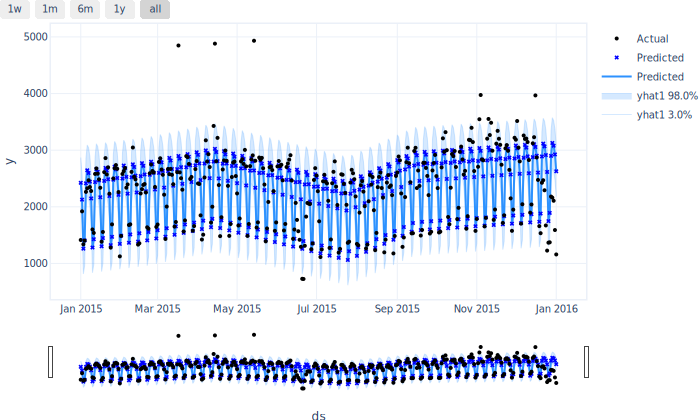

In [106]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# evaluate uncertainy on calibration set
train_df, cal_df = model.split_df(df_neupt, valid_p=0.05)
method = "naive"  # or "cqr" for a more sophisticated method, see uncertainty tutorial
conformal_forecast = model.conformal_predict(train_df, cal_df, alpha=0.1, method=method)
model.highlight_nth_step_ahead_of_each_forecast(1).plot(conformal_forecast)

### Trend Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


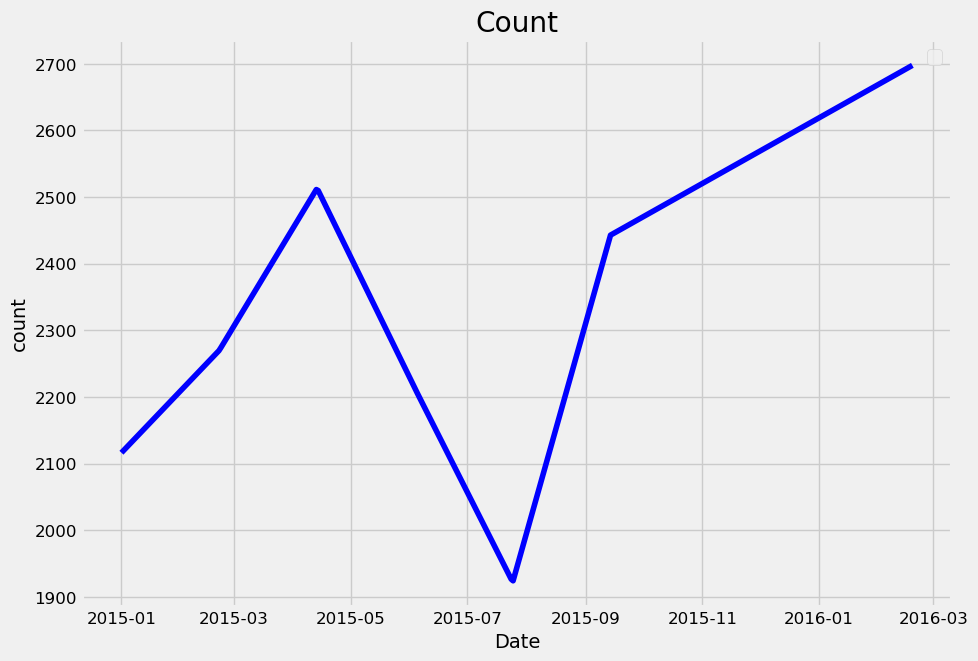

In [107]:
plt.figure(figsize=(10, 7))
plt.plot(forecast_neupt['ds'], forecast_neupt['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('count')
plt.title('Count');

### Plot Components of Time-series

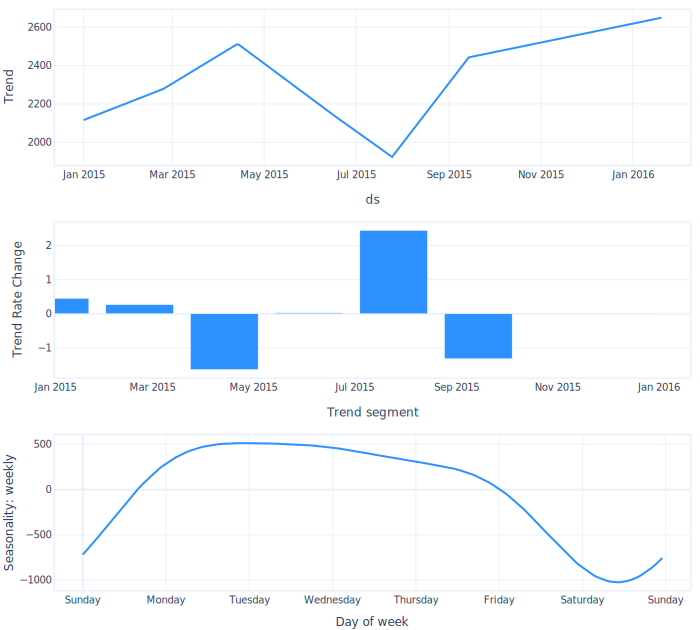

In [108]:
#plotting components of model
model.plot_parameters()

### Modelin Diagnostik qrafikləri çıxarılır

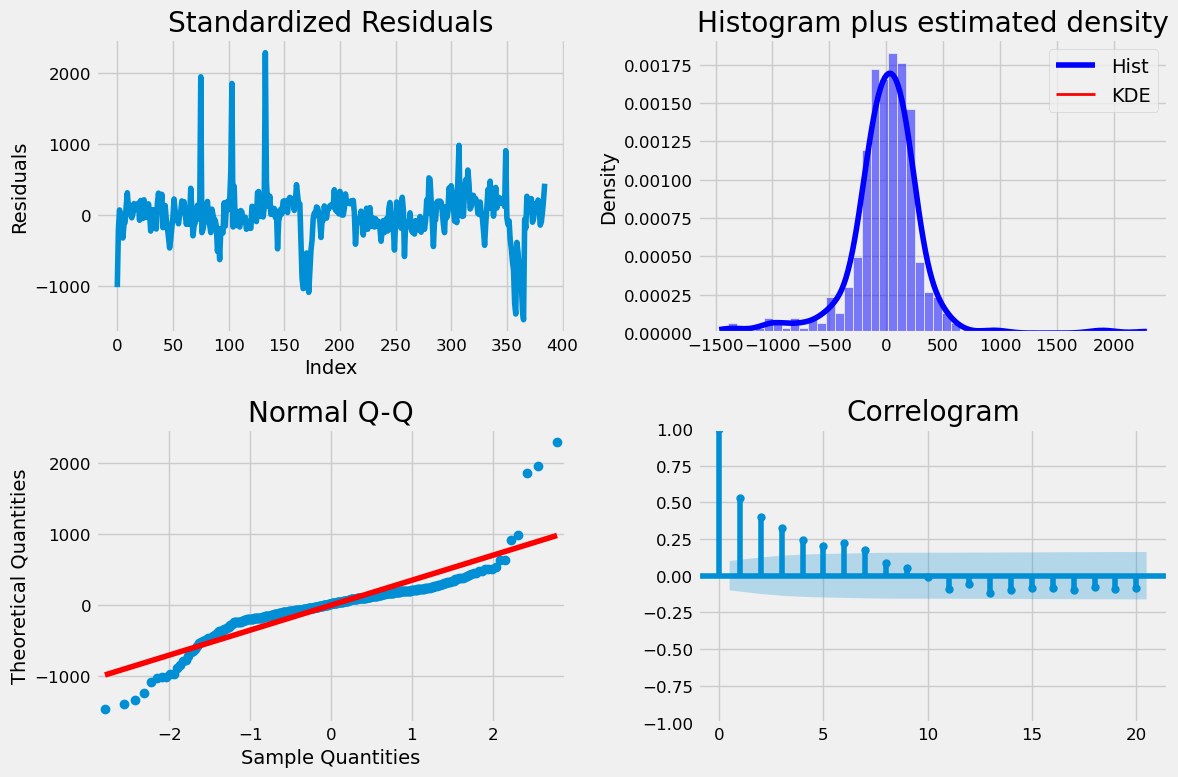

In [109]:
# Qalıqları hesablayın
residuals = df_neupt['y'] - forecast_neupt['yhat1'][:len(df_neupt)]

# Vizualizasiya üçün tərtibat
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standartlaşdırılmış qalıqlar
axs[0, 0].plot(residuals)
axs[0, 0].set_title('Standardized Residuals')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Residuals')

# 2. Histogram və KDE
sns.histplot(residuals, kde=True, ax=axs[0, 1], stat='density', color='blue')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].axhline(0, color='red', lw=2)
axs[0, 1].legend(['Hist', 'KDE'])

# 3. Q-Q Plot
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s', ax=axs[1, 0])  # line='s' xətdə qırmızı xətt çəkmək üçündür
axs[1, 0].set_title('Normal Q-Q')
axs[1, 0].set_xlabel('Sample Quantities')
axs[1, 0].set_ylabel('Theoretical Quantities')
plt.grid(True)


# 4. Korrelogram
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axs[1, 1], lags=20)
axs[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

### 1. Her Epoch ucun Modelin təlimi zamanı performans ölçülərini əldə etmək:

In [110]:
# Her Epoch ucun Təlim prosesinin metriklərini əldə etmək
train_metrics = metrics
print(train_metrics)

    train_loss  reg_loss         MAE         RMSE      Loss  RegLoss  epoch
0     0.242774       0.0  524.282104   687.322754  0.237395      0.0      0
1     0.085553       0.0  332.531708   452.557190  0.083936      0.0      1
2     0.066593       0.0  275.166931   381.341949  0.066204      0.0      2
3     0.060340       0.0  280.050903   398.751007  0.058568      0.0      3
4     0.051625       0.0  291.690552   406.693726  0.052028      0.0      4
5     0.092745       0.0  439.325195   584.802551  0.089697      0.0      5
6     0.091065       0.0  389.532898   515.673340  0.089172      0.0      6
7     0.091551       0.0  401.092255   535.510925  0.091084      0.0      7
8     0.124034       0.0  545.350891   703.574158  0.120662      0.0      8
9     0.144000       0.0  563.992920   713.679382  0.142684      0.0      9
10    0.250151       0.0  838.004639  1134.050293  0.242772      0.0     10
11    0.208400       0.0  650.879822   801.193970  0.202879      0.0     11
12    0.2078

### 2. Son nəticə olaraq tək bir metrik (MAE və ya MSE) əldə etmək:

In [111]:
# Metrikləri çıxarmaq
final_mae = metrics['MAE'].values[-1]  # MAE dəyərinin sonuncu iterasiyasını əldə edir
final_rmse = metrics['RMSE'].values[-1]  # MSE dəyərinin sonuncu iterasiyasını əldə edir

# Metrikləri çap etmək
print(f"Final MAE: {final_mae}")
print(f"Final RMSE: {final_rmse}")

Final MAE: 213.30133056640625
Final RMSE: 321.92938232421875


### 3. Proqnozdan sonra metrikləri əldə etmək:

In [112]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = df_neupt['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast_neupt['yhat1'][:len(df_neupt['y'])] # Proqnozlaşdırılan dəyərlər


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): 0.7145451591455412
Mean Absolute Error (MAE): 217.0788017052276
Mean Absolute Percentage Error (MAPE): 0.10210308573033385
Mean Squared Error (MSE): 123390.88400001742
Root Mean Squared Error (RMSE): 351.270385885314


### Difference show with Real and Pred

In [113]:
pd.DataFrame({'date': df_neupt.ds, 'real': y_true.values, 'frcst': y_pred.values, 
                                                      'diff': y_true.values - y_pred.values})

date    real        frcst         diff
0   2015-01-01  1414.0  2423.984375 -1009.984375
1   2015-01-02  1920.0  2127.178467  -207.178467
2   2015-01-03  1338.0  1260.950928    77.049072
3   2015-01-04  1404.0  1407.045654    -3.045654
4   2015-01-05  2264.0  2415.385254  -151.385254
..         ...     ...          ...          ...
380 2016-01-16  1644.0  1781.125610  -137.125610
381 2016-01-17  1836.0  1926.233398   -90.233398
382 2016-01-18  2983.0  2933.968262    49.031738
383 2016-01-19  3389.0  3161.412354   227.587646
384 2016-01-20  3559.0  3112.441162   446.558838

[385 rows x 4 columns]

### Only Forecast Data

In [114]:
forecast_neupt[-30:].head(5)

ds   y        yhat1   yhat1 3.0%  yhat1 98.0%        trend  \
385 2016-01-21 NaN  2958.874756  1736.752441  3711.814453  2650.984131   
386 2016-01-22 NaN  2660.575195  1438.018311  3101.781494  2652.597168   
387 2016-01-23 NaN  1792.262695   987.565308  2095.241211  2654.209961   
388 2016-01-24 NaN  1937.685303  1135.033813  2209.707031  2655.822754   
389 2016-01-25 NaN  2944.504883  1916.002808  3346.424805  2657.436035   

     season_weekly  
385     307.890747  
386       7.978285  
387    -861.947327  
388    -718.137573  
389     287.068939

## Time-series modeling with NeuralProphet vs ParameterGrid

In [203]:
# !pip install neuralprophet

In [204]:
# !pip install plotly-resampler

In [205]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Selection Feature

In [206]:
df_pr_neupt = copy.deepcopy(df)
df_pr_neupt = df[['date', 'count']].rename(columns={"date": 'ds', "count": 'y'})
df_pr_neupt

ds       y
0   2015-01-01  1414.0
1   2015-01-02  1920.0
2   2015-01-03  1338.0
3   2015-01-04  1404.0
4   2015-01-05  2264.0
..         ...     ...
380 2016-01-16  1644.0
381 2016-01-17  1836.0
382 2016-01-18  2983.0
383 2016-01-19  3389.0
384 2016-01-20  3559.0

[385 rows x 2 columns]

### ParameterGrid 
 **All parameters vs Learning rate in ParameterGrid**
 - gec isleyir amma

In [207]:
# from sklearn.model_selection import ParameterGrid

# parameters = {
#             "n_changepoints": [4, 5],  # Dəyişiklik nöqtələrinin sayı kiçik aralıqlarda dəyişir
#             "changepoints_range": [0.8, 0.9],  # 80-90% aralığında dəyişiklik nöqtələrinin yerləşdirilməsi
#             "trend_reg": [0, 0.2],  # Trend üçün cərimə, regulyarizasiya dəyərləri kiçik tutulur
#             "seasonality_reg": [0, 0.2],  # Sezonsallıq üçün cərimə
#              "learning_rate": np.logspace(np.log10(0.001), np.log10(0.9), 4).tolist()  
#                                                                     # 0.001-dən 0.9-a logarifmik artan 10 dəyər
#             }

# parameter_grid = ParameterGrid(parameters)

# # Nəticələrin saxlanması üçün boş siyahı
# parameter_list = []

# # Model üçün təlim datanızın adı 'model_df' olmalıdır
# # model_df DataFrame içində 'ds' sütunu (tarixlər) və 'y' sütunu (məqsəd dəyişəni) olmalıdır

# for p in parameter_grid:
#     print("Testing parameters:", p)
    
#     # Prophet modeli qurmaq
#     from neuralprophet import NeuralProphet, set_log_level

#     # Disable logging messages unless there is an error
#     set_log_level("ERROR")
#     confidence_level = 0.95
#     boundaries = round((1 - confidence_level) / 2, 2)
#     # NeuralProphet only accepts quantiles value in between 0 and 1
#     quantiles = [boundaries, confidence_level + boundaries]

#     model = NeuralProphet(
#         quantiles=quantiles,
#         # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
#         growth="linear",
#         # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
#         changepoints=None,
#         # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
#         n_changepoints=p["n_changepoints"],
#         # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
#         changepoints_range=p["changepoints_range"],
#         # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
#         trend_reg=p["trend_reg"],
#         # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
#         trend_reg_threshold=False,
#         # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
#         yearly_seasonality="auto",
#         # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
#         weekly_seasonality="auto",
#         # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
#         daily_seasonality="auto",
#         # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
#         seasonality_mode="additive",
#         # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
#         seasonality_reg=p["seasonality_reg"],
#         # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
#         n_forecasts=1,
#         # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
#         n_lags=0,
#         # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
#         loss_func="Huber",
#         # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
#         normalize="auto",
#         # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
#         impute_missing=True
#         # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
#     #   num_hidden_layers=0,
#         # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
#     #   d_hidden=None,     
#         # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
#     #   ar_sparsity=None,  
#     )

#     model.set_plotting_backend("plotly-static")
    
#     # Modeli öyrətmək
#     metrics=model.fit(df_pr_neupt,
#         learning_rate=p["learning_rate"],  # Öyrənmə sürətini manual təyin edirsiniz
#         epochs=40,           
#         freq="D",)
    
#     # Gələcək üçün dataframe yaratmaq (100 gün irəliyə)
#     future = model.make_future_dataframe(df_pr_neupt, periods=30, n_historic_predictions=len(df_pr_neupt))
    
#     # Proqnoz yaratmaq
#     forecast = model.predict(future)
    
#     # Proqnozlanmış dəyərlərdən yalnız 'ds' və 'yhat' sütunlarını seçirik
#     predicted = forecast[['ds', 'yhat1']]
    
#     # Əsl dəyərlər 'model_df' içində olmalıdır
#     actual = df_pr_neupt
    
#     # MPE (Mean Percentage Error) hesablanması
# #     mpe = np.mean((predicted['yhat1'].values[:len(actual['y'].values)] - actual['y'].values) / actual['y'].values)
#     mpe = np.mean(np.abs((predicted['yhat1'].values[:len(actual['y'].values)] - actual['y'].\
#                                                                                    values) / actual['y'].values))
#     print("MPE:", mpe)
    
#     # Hər parametri və onun MPE dəyərini siyahıya əlavə etmək
#     parameter_list.append([mpe, p])

# # Nəticələr siyahısı - hər parametr dəsti üçün MPE və parametrlər çap olunur
# print(parameter_list)

### Find Best Learning Rate

In [208]:
# !pip install optuna

In [209]:
from neuralprophet import NeuralProphet
import optuna

def objective(trial):
    model = NeuralProphet(
    # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
    growth="linear",
    # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
    changepoints=None,
    # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
    n_changepoints=5,
    # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
    changepoints_range=0.8,
    # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
    trend_reg=0,
    # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
    trend_reg_threshold=False,
    # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    yearly_seasonality="auto",
    # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    weekly_seasonality="auto",
    # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    daily_seasonality="auto",
    # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
    seasonality_mode="additive",
    # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
    seasonality_reg=0,
    # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
    n_forecasts=1,
    # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
    n_lags=0,
    # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
    loss_func="Huber",
    # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
    normalize="auto",
    # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
    impute_missing=True
    # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
#   num_hidden_layers=0,
    # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
#   d_hidden=None,     
    # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
#   ar_sparsity=None,  
)
    lr = trial.suggest_loguniform('learning_rate', 0.001, 0.9)
    
    # Learning rate dəyərini çap edir
    print(f"Current trial learning rate: {lr}")    

    # Modeli fit edirik
    metrics = model.fit(df_pr_neupt, learning_rate=lr, epochs=40, freq="D")

    if len(metrics['Loss']) > 0:
        return metrics['Loss'].iloc[-1]
    else:
        raise ValueError("Loss seriyası boşdur.")

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print("Best learning rate: ", study.best_params)

[I 2024-10-29 13:59:47,097] A new study created in memory with name: no-name-f109fc7e-03c0-45d2-81ba-7e9d2cbbb13a


Current trial learning rate: 0.002201337801639387


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 14:00:20,114] Trial 0 finished with value: 0.027659637853503227 and parameters: {'learning_rate': 0.002201337801639387}. Best is trial 0 with value: 0.027659637853503227.


Current trial learning rate: 0.8280620698841327


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 14:00:51,543] Trial 1 finished with value: 0.02348913997411728 and parameters: {'learning_rate': 0.8280620698841327}. Best is trial 1 with value: 0.02348913997411728.


Current trial learning rate: 0.2202230783559724


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 14:01:21,419] Trial 2 finished with value: 0.021575581282377243 and parameters: {'learning_rate': 0.2202230783559724}. Best is trial 2 with value: 0.021575581282377243.


Current trial learning rate: 0.35015345645966006


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 14:01:51,780] Trial 3 finished with value: 0.021715393289923668 and parameters: {'learning_rate': 0.35015345645966006}. Best is trial 2 with value: 0.021575581282377243.


Current trial learning rate: 0.18826728598625586


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 14:02:21,259] Trial 4 finished with value: 0.021890273317694664 and parameters: {'learning_rate': 0.18826728598625586}. Best is trial 2 with value: 0.021575581282377243.


Current trial learning rate: 0.17597259590390768


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 14:02:51,777] Trial 5 finished with value: 0.021735329180955887 and parameters: {'learning_rate': 0.17597259590390768}. Best is trial 2 with value: 0.021575581282377243.


Current trial learning rate: 0.03551430781829243


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 14:03:21,627] Trial 6 finished with value: 0.021907109767198563 and parameters: {'learning_rate': 0.03551430781829243}. Best is trial 2 with value: 0.021575581282377243.


Current trial learning rate: 0.048222345507835294


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 14:03:52,486] Trial 7 finished with value: 0.021889789029955864 and parameters: {'learning_rate': 0.048222345507835294}. Best is trial 2 with value: 0.021575581282377243.


Current trial learning rate: 0.0667607058287358


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 14:04:23,611] Trial 8 finished with value: 0.021445510908961296 and parameters: {'learning_rate': 0.0667607058287358}. Best is trial 8 with value: 0.021445510908961296.


Current trial learning rate: 0.0091131851499248


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 14:04:54,061] Trial 9 finished with value: 0.02424789033830166 and parameters: {'learning_rate': 0.0091131851499248}. Best is trial 8 with value: 0.021445510908961296.


Best learning rate:  {'learning_rate': 0.0667607058287358}


### ParameterGrid

In [210]:
from sklearn.model_selection import ParameterGrid

parameters = {
            "n_changepoints": [5],  # Dəyişiklik nöqtələrinin sayı kiçik aralıqlarda dəyişir
            "changepoints_range": [0.8, 0.9],  # 80-90% aralığında dəyişiklik nöqtələrinin yerləşdirilməsi
            "trend_reg": [0, 0.2],  # Trend üçün cərimə, regulyarizasiya dəyərləri kiçik tutulur
            "seasonality_reg": [0, 0.2],  # Sezonsallıq üçün cərimə
            }

parameter_grid = ParameterGrid(parameters)

In [212]:
# Nəticələrin saxlanması üçün boş siyahı
parameter_list = []

# Model üçün təlim datanızın adı 'model_df' olmalıdır
# model_df DataFrame içində 'ds' sütunu (tarixlər) və 'y' sütunu (məqsəd dəyişəni) olmalıdır

for p in parameter_grid:
    print("Testing parameters:", p)
    
    # Prophet modeli qurmaq
    from neuralprophet import NeuralProphet, set_log_level

    # Disable logging messages unless there is an error
    set_log_level("ERROR")
    confidence_level = 0.95
    boundaries = round((1 - confidence_level) / 2, 2)
    # NeuralProphet only accepts quantiles value in between 0 and 1
    quantiles = [boundaries, confidence_level + boundaries]

    model = NeuralProphet(
        quantiles=quantiles,
        # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
        growth="linear",
        # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
        changepoints=None,
        # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
        n_changepoints=p["n_changepoints"],
        # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
        changepoints_range=p["changepoints_range"],
        # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
        trend_reg=p["trend_reg"],
        # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
        trend_reg_threshold=False,
        # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
        yearly_seasonality="auto",
        # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
        weekly_seasonality="auto",
        # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
        daily_seasonality="auto",
        # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
        seasonality_mode="additive",
        # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
        seasonality_reg=p["seasonality_reg"],
        # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
        n_forecasts=1,
        # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
        n_lags=0,
        # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
        loss_func="Huber",
        # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
        normalize="auto",
        # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
        impute_missing=True
        # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
    #   num_hidden_layers=0,
        # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
    #   d_hidden=None,     
        # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
    #   ar_sparsity=None,  
    )

    model.set_plotting_backend("plotly-static")
    
    # Modeli öyrətmək
    metrics=model.fit(df_pr_neupt,
        learning_rate=0.0667607058287358,  # Öyrənmə sürətini manual təyin edirsiniz
        epochs=40,           
        freq="D",)
    
    # Gələcək üçün dataframe yaratmaq (100 gün irəliyə)
    future = model.make_future_dataframe(df_pr_neupt, periods=30, n_historic_predictions=len(df_pr_neupt))
    
    # Proqnoz yaratmaq
    forecast = model.predict(future)
    
    # Proqnozlanmış dəyərlərdən yalnız 'ds' və 'yhat' sütunlarını seçirik
    predicted = forecast[['ds', 'yhat1']]
    
    # Əsl dəyərlər 'model_df' içində olmalıdır
    actual = df_pr_neupt
    
    # MPE (Mean Percentage Error) hesablanması
    mpe = np.mean((predicted['yhat1'].values[:len(actual['y'].values)] - actual['y'].values) / actual['y'].values)
    
    print("MPE:", mpe)
    
    # Hər parametri və onun MPE dəyərini siyahıya əlavə etmək
    parameter_list.append([mpe, p])

# Nəticələr siyahısı - hər parametr dəsti üçün MPE və parametrlər çap olunur
print(parameter_list)

Testing parameters: {'changepoints_range': 0.8, 'n_changepoints': 5, 'seasonality_reg': 0, 'trend_reg': 0}


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

MPE: 0.019748134508601915
Testing parameters: {'changepoints_range': 0.8, 'n_changepoints': 5, 'seasonality_reg': 0, 'trend_reg': 0.2}


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

MPE: 0.030239363212427196
Testing parameters: {'changepoints_range': 0.8, 'n_changepoints': 5, 'seasonality_reg': 0.2, 'trend_reg': 0}


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

MPE: 0.021579961543649
Testing parameters: {'changepoints_range': 0.8, 'n_changepoints': 5, 'seasonality_reg': 0.2, 'trend_reg': 0.2}


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

MPE: 0.027257233857852805
Testing parameters: {'changepoints_range': 0.9, 'n_changepoints': 5, 'seasonality_reg': 0, 'trend_reg': 0}


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

MPE: 0.015825545609801858
Testing parameters: {'changepoints_range': 0.9, 'n_changepoints': 5, 'seasonality_reg': 0, 'trend_reg': 0.2}


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

MPE: 0.02487302887837415
Testing parameters: {'changepoints_range': 0.9, 'n_changepoints': 5, 'seasonality_reg': 0.2, 'trend_reg': 0}


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

MPE: 0.023547264069868568
Testing parameters: {'changepoints_range': 0.9, 'n_changepoints': 5, 'seasonality_reg': 0.2, 'trend_reg': 0.2}


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

MPE: 0.019907844952367557
[[0.019748134508601915, {'changepoints_range': 0.8, 'n_changepoints': 5, 'seasonality_reg': 0, 'trend_reg': 0}], [0.030239363212427196, {'changepoints_range': 0.8, 'n_changepoints': 5, 'seasonality_reg': 0, 'trend_reg': 0.2}], [0.021579961543649, {'changepoints_range': 0.8, 'n_changepoints': 5, 'seasonality_reg': 0.2, 'trend_reg': 0}], [0.027257233857852805, {'changepoints_range': 0.8, 'n_changepoints': 5, 'seasonality_reg': 0.2, 'trend_reg': 0.2}], [0.015825545609801858, {'changepoints_range': 0.9, 'n_changepoints': 5, 'seasonality_reg': 0, 'trend_reg': 0}], [0.02487302887837415, {'changepoints_range': 0.9, 'n_changepoints': 5, 'seasonality_reg': 0, 'trend_reg': 0.2}], [0.023547264069868568, {'changepoints_range': 0.9, 'n_changepoints': 5, 'seasonality_reg': 0.2, 'trend_reg': 0}], [0.019907844952367557, {'changepoints_range': 0.9, 'n_changepoints': 5, 'seasonality_reg': 0.2, 'trend_reg': 0.2}]]


In [222]:
parameters_df = pd.DataFrame(parameter_list, columns=['MPE', 'P'])
parameters_df

MPE                                                  P
0  0.019748  {'changepoints_range': 0.8, 'n_changepoints': ...
1  0.030239  {'changepoints_range': 0.8, 'n_changepoints': ...
2  0.021580  {'changepoints_range': 0.8, 'n_changepoints': ...
3  0.027257  {'changepoints_range': 0.8, 'n_changepoints': ...
4  0.015826  {'changepoints_range': 0.9, 'n_changepoints': ...
5  0.024873  {'changepoints_range': 0.9, 'n_changepoints': ...
6  0.023547  {'changepoints_range': 0.9, 'n_changepoints': ...
7  0.019908  {'changepoints_range': 0.9, 'n_changepoints': ...

In [223]:
# parameters_df = parameters_df.iloc[parameters_df['MPE'].abs().argsort()]
# parameters_df

parameters_df = parameters_df.sort_values(by='MPE')
parameters_df

MPE                                                  P
4  0.015826  {'changepoints_range': 0.9, 'n_changepoints': ...
0  0.019748  {'changepoints_range': 0.8, 'n_changepoints': ...
7  0.019908  {'changepoints_range': 0.9, 'n_changepoints': ...
2  0.021580  {'changepoints_range': 0.8, 'n_changepoints': ...
6  0.023547  {'changepoints_range': 0.9, 'n_changepoints': ...
5  0.024873  {'changepoints_range': 0.9, 'n_changepoints': ...
3  0.027257  {'changepoints_range': 0.8, 'n_changepoints': ...
1  0.030239  {'changepoints_range': 0.8, 'n_changepoints': ...

In [224]:
print("Lowest MPE: ", parameters_df.iloc[0, 0]) 
print("Parameters: ", parameters_df.iloc[0, 1])

Lowest MPE:  0.015825545609801858
Parameters:  {'changepoints_range': 0.9, 'n_changepoints': 5, 'seasonality_reg': 0, 'trend_reg': 0}


### Creat Model NeuralProphet with Best Parameters

In [225]:
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")
confidence_level = 0.95
boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]

model = NeuralProphet(
    quantiles=quantiles,
    # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
    growth="linear",
    # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
    changepoints=None,
    # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
    n_changepoints=5,
    # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
    changepoints_range=0.9,
    # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
    trend_reg=0,
    # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
    trend_reg_threshold=False,
    # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    yearly_seasonality="auto",
    # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    weekly_seasonality="auto",
    # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    daily_seasonality="auto",
    # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
    seasonality_mode="additive",
    # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
    seasonality_reg=0,
    # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
    n_forecasts=1,
    # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
    n_lags=0,
    # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
    loss_func="Huber",
    # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
    normalize="auto",
    # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
    impute_missing=True
    # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
#   num_hidden_layers=0,
    # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
#   d_hidden=None,     
    # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
#   ar_sparsity=None,  
)


model.set_plotting_backend("plotly-static")

metrics = model.fit(df_pr_neupt,
    learning_rate=0.6003333333333334,  # Öyrənmə sürətini manual təyin edirsiniz
    epochs=40,           
    freq="D",)

Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

### Forecast

In [226]:
# Gələcək üçün proqnozlaşdırma dataframesi yaradır (yəni 30 period irəli) 
# Tarixi dəyərləri də nəzərə alır (n_historic_predictions=len(y))
future = model.make_future_dataframe(df_pr_neupt, periods=30, n_historic_predictions=len(df_pr_neupt))

# Gələcək data üçün proqnozlar yaradır
forecast_pr_neupt = model.predict(future)

Predicting: |                                            | 0/? [00:00<?, ?it/s]

In [227]:
forecast_pr_neupt

ds       y        yhat1   yhat1 3.0%  yhat1 98.0%        trend  \
0   2015-01-01  1414.0  2391.414062  1158.101074  4385.243652  2084.290527   
1   2015-01-02  1920.0  2113.009277   914.402344  3831.322266  2087.955811   
2   2015-01-03  1338.0  1231.311523   432.972229  2731.836914  2091.621094   
3   2015-01-04  1404.0  1381.701904   540.212097  2870.646973  2095.286621   
4   2015-01-05  2264.0  2394.444336  1325.659302  4032.143799  2098.951660   
..         ...     ...          ...          ...          ...          ...   
410 2016-02-15     NaN  2786.322998  1533.460083  3329.375000  2490.970947   
411 2016-02-16     NaN  2993.179932  1858.975220  4204.790039  2489.686035   
412 2016-02-17     NaN  2931.118652  1699.879150  3902.950195  2488.400879   
413 2016-02-18     NaN  2794.353271  1385.643066  3652.178223  2487.115723   
414 2016-02-19     NaN  2511.744385  1122.377563  3108.939941  2485.830811   

     season_weekly  
0       307.123627  
1        25.053452  
2      -860.309631  
3      -713.584595  
4       295.492615  
..             ...  
410     295.352203  
411     503.493988  
412     442.717743  
413     307.237396  
414      25.913540  

[415 rows x 7 columns]

In [228]:
forecast_pr_neupt[-30:].head()

ds   y        yhat1   yhat1 3.0%  yhat1 98.0%        trend  \
385 2016-01-21 NaN  2830.343994  1624.802490  3615.075195  2523.097656   
386 2016-01-22 NaN  2546.917725  1361.052979  3070.891357  2521.812500   
387 2016-01-23 NaN  1659.561279   859.404541  1980.588501  2520.527344   
388 2016-01-24 NaN  1805.733887   947.251587  2130.091309  2519.242188   
389 2016-01-25 NaN  2813.391846  1712.828369  3301.497803  2517.957031   

     season_weekly  
385     307.246399  
386      25.105301  
387    -860.966064  
388    -713.508423  
389     295.434753

### Plotting Forecast

Predicting: |                                            | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

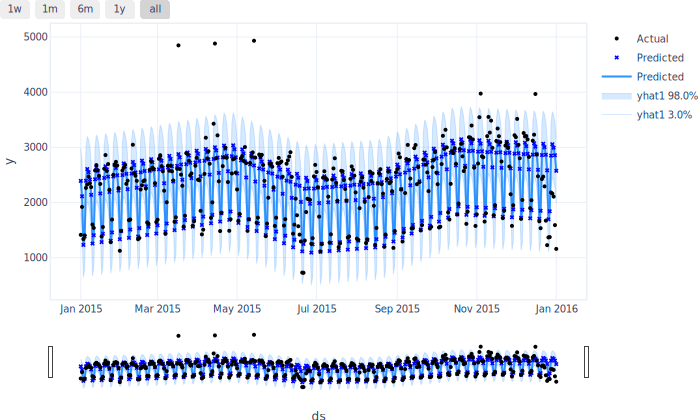

In [229]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# evaluate uncertainy on calibration set
train_df, cal_df = model.split_df(df_pr_neupt, valid_p=0.05)
method = "naive"  # or "cqr" for a more sophisticated method, see uncertainty tutorial
conformal_forecast = model.conformal_predict(train_df, cal_df, alpha=0.1, method=method)
model.highlight_nth_step_ahead_of_each_forecast(1).plot(conformal_forecast)

### Trend Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


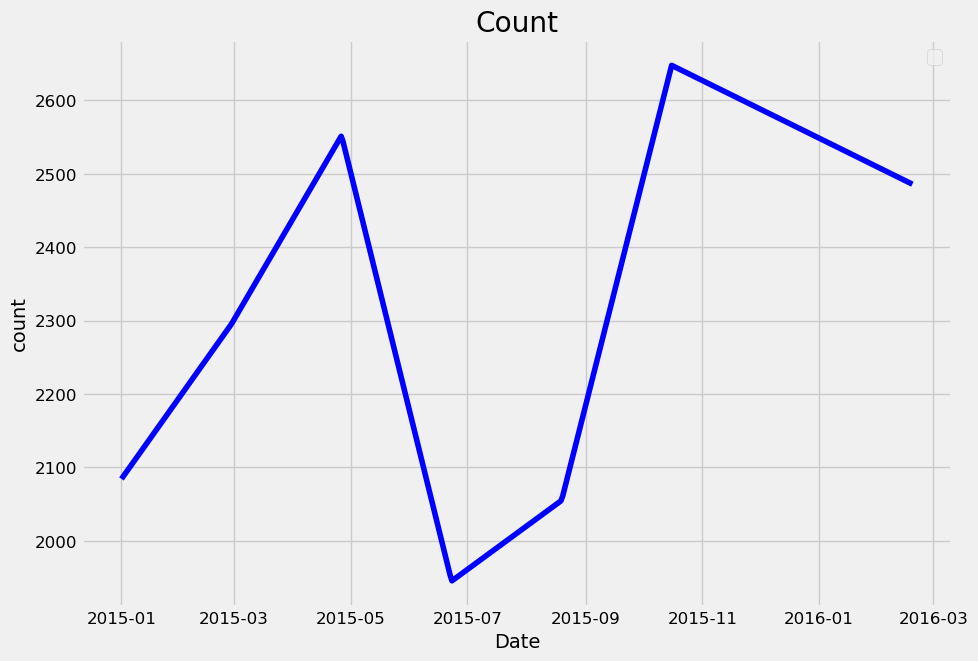

In [230]:
plt.figure(figsize=(10, 7))
plt.plot(forecast_pr_neupt['ds'], forecast_pr_neupt['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('count')
plt.title('Count');

### Plot Components of Time-series

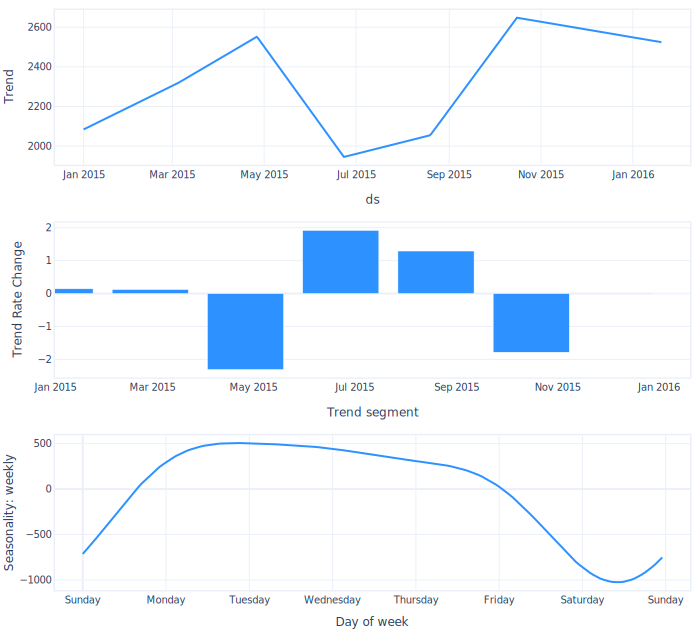

In [231]:
#plotting components of model
model.plot_parameters()

### Modelin Diagnostik qrafikləri çıxarılır

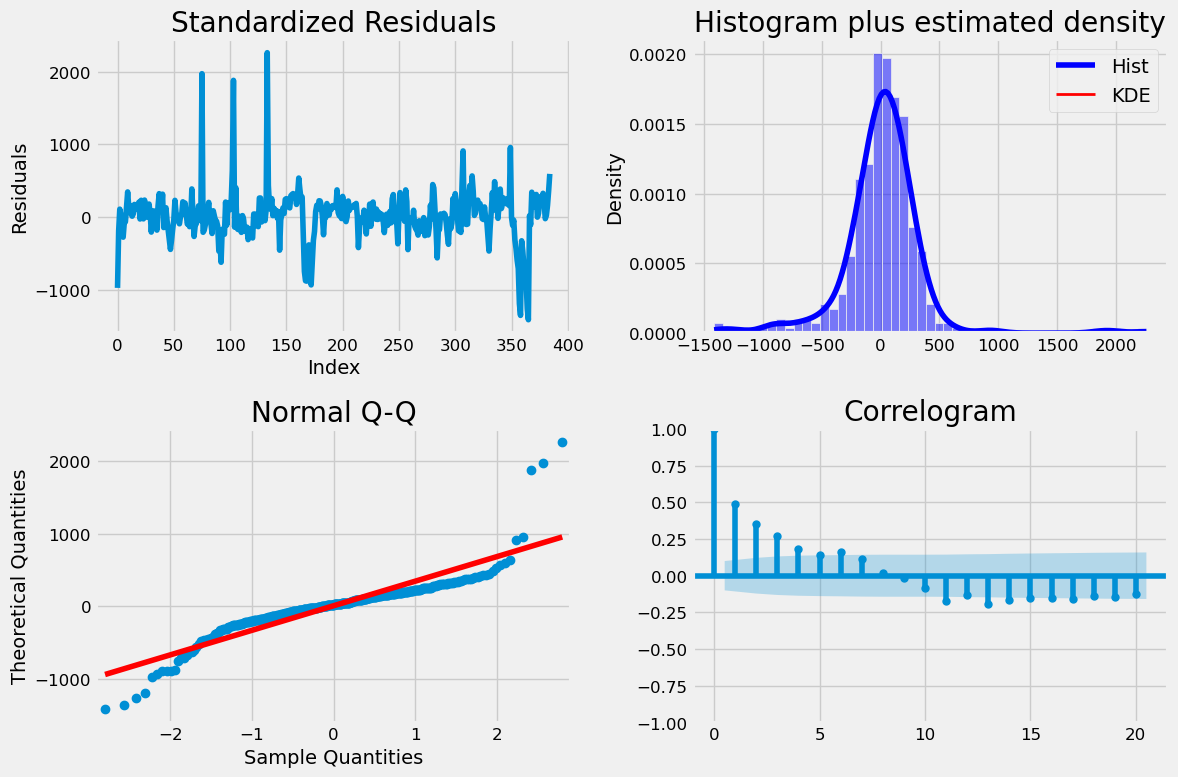

In [232]:
import seaborn as sns

# Qalıqları hesablayın
residuals = df_pr_neupt['y'] - forecast_pr_neupt['yhat1'][:len(df_pr_neupt)]

# Vizualizasiya üçün tərtibat
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standartlaşdırılmış qalıqlar
axs[0, 0].plot(residuals)
axs[0, 0].set_title('Standardized Residuals')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Residuals')

# 2. Histogram və KDE
sns.histplot(residuals, kde=True, ax=axs[0, 1], stat='density', color='blue')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].axhline(0, color='red', lw=2)
axs[0, 1].legend(['Hist', 'KDE'])

# 3. Q-Q Plot
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s', ax=axs[1, 0])  # line='s' xətdə qırmızı xətt çəkmək üçündür
axs[1, 0].set_title('Normal Q-Q')
axs[1, 0].set_xlabel('Sample Quantities')
axs[1, 0].set_ylabel('Theoretical Quantities')
plt.grid(True)


# 4. Korrelogram
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axs[1, 1], lags=20)
axs[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

### 1. Her Epoch ucun Modelin təlimi zamanı performans ölçülərini əldə etmək:

In [233]:
# Her Epoch ucun Təlim prosesinin metriklərini əldə etmək
train_metrics = metrics
print(train_metrics)

    train_loss  reg_loss          MAE         RMSE      Loss  RegLoss  epoch
0     0.185843       0.0   645.381104   787.816345  0.180785      0.0      0
1     0.113318       0.0   450.484985   581.375549  0.109885      0.0      1
2     0.079978       0.0   362.840149   475.644348  0.078187      0.0      2
3     0.073843       0.0   349.169952   468.929535  0.074398      0.0      3
4     0.065007       0.0   298.225708   402.107544  0.065777      0.0      4
5     0.168095       0.0   633.515381   813.697754  0.170862      0.0      5
6     0.206709       0.0   762.010559   974.528687  0.210136      0.0      6
7     0.454817       0.0  1402.784058  2100.440918  0.446987      0.0      7
8     0.326816       0.0   909.376038  1134.911011  0.321048      0.0      8
9     0.388744       0.0   925.855286  1158.091309  0.377769      0.0      9
10    0.260193       0.0   635.244202   770.555603  0.262383      0.0     10
11    0.326543       0.0   791.358521  1003.842285  0.321630      0.0     11

### 2. Son nəticə olaraq tək bir metrik (MAE və ya MSE) əldə etmək:

In [234]:
# Metrikləri çıxarmaq
final_mae = metrics['MAE'].values[-1]  # MAE dəyərinin sonuncu iterasiyasını əldə edir
final_rmse = metrics['RMSE'].values[-1]  # MSE dəyərinin sonuncu iterasiyasını əldə edir

# Metrikləri çap etmək
print(f"Final MAE: {final_mae}")
print(f"Final RMSE: {final_rmse}")

Final MAE: 211.53897094726562
Final RMSE: 311.9194030761719


### 3. Proqnozdan sonra metrikləri əldə etmək:

In [235]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = df_pr_neupt['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast_pr_neupt['yhat1'][:len(df_pr_neupt['y'])] # Proqnozlaşdırılan dəyərlər


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): 0.7345352027743903
Mean Absolute Error (MAE): 210.4605853268794
Mean Absolute Percentage Error (MAPE): 0.09716405081744164
Mean Squared Error (MSE): 114749.9755215369
Root Mean Squared Error (RMSE): 338.74765758826567


### Difference show with Real and Pred

In [236]:
pd.DataFrame({'date': df_pr_neupt.ds, 'real': y_true.values, 'frcst': y_pred.values, 
                                                      'diff': y_true.values - y_pred.values})

date    real        frcst        diff
0   2015-01-01  1414.0  2391.414062 -977.414062
1   2015-01-02  1920.0  2113.009277 -193.009277
2   2015-01-03  1338.0  1231.311523  106.688477
3   2015-01-04  1404.0  1381.701904   22.298096
4   2015-01-05  2264.0  2394.444336 -130.444336
..         ...     ...          ...         ...
380 2016-01-16  1644.0  1668.711914  -24.711914
381 2016-01-17  1836.0  1814.564575   21.435425
382 2016-01-18  2983.0  2823.131348  159.868652
383 2016-01-19  3389.0  3029.163818  359.836182
384 2016-01-20  3559.0  2967.109619  591.890381

[385 rows x 4 columns]

### Only Forecast Data

In [237]:
forecast_pr_neupt[-30:].head(5)

ds   y        yhat1   yhat1 3.0%  yhat1 98.0%        trend  \
385 2016-01-21 NaN  2830.343994  1624.802490  3615.075195  2523.097656   
386 2016-01-22 NaN  2546.917725  1361.052979  3070.891357  2521.812500   
387 2016-01-23 NaN  1659.561279   859.404541  1980.588501  2520.527344   
388 2016-01-24 NaN  1805.733887   947.251587  2130.091309  2519.242188   
389 2016-01-25 NaN  2813.391846  1712.828369  3301.497803  2517.957031   

     season_weekly  
385     307.246399  
386      25.105301  
387    -860.966064  
388    -713.508423  
389     295.434753

## Time Series Modeling with NeuarlProphet vs Optuna

In [238]:
# !pip install neuralprophet

In [239]:
# !pip install plotly-resampler

In [240]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Selection Feature

In [241]:
df_byopt_neupt = copy.deepcopy(df)
df_byopt_neupt = df[['date', 'count']].rename(columns={"date": 'ds', "count": 'y'})
df_byopt_neupt

ds       y
0   2015-01-01  1414.0
1   2015-01-02  1920.0
2   2015-01-03  1338.0
3   2015-01-04  1404.0
4   2015-01-05  2264.0
..         ...     ...
380 2016-01-16  1644.0
381 2016-01-17  1836.0
382 2016-01-18  2983.0
383 2016-01-19  3389.0
384 2016-01-20  3559.0

[385 rows x 2 columns]

### BayesianOptimization error verir

In [242]:
# !pip install bayesian-optimization 

In [243]:
# import pandas as pd
# from prophet import Prophet
# from prophet.diagnostics import cross_validation
# from prophet.diagnostics import performance_metrics
# from bayes_opt import BayesianOptimization

# # Modelin optimizasiyası üçün funksiya təyin edir
# def optimization_function(n_changepoints, changepoints_range, trend_reg, seasonality_reg):
    
#     # seasonality_mode ədədi dəyərini müvafiq mətn formatına çevir
# #     if seasonality_mode == 0:
# #         seasonality_mode_str = 'additive'
# #     else:
# #         seasonality_mode_str = 'multiplicative'
    
#     model = NeuralProphet(
#         # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
#         growth="linear",
#         # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
#         changepoints=None,
#         # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
#         n_changepoints=int(n_changepoints),
#         # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
#         changepoints_range=changepoints_range,
#         # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
#         trend_reg=trend_reg,
#         # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
#         trend_reg_threshold=False,
#         # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
#         yearly_seasonality="auto",
#         # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
#         weekly_seasonality="auto",
#         # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
#         daily_seasonality="auto",
#         # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
#         seasonality_mode='additive',
#         # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
#         seasonality_reg=0,
#         # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
#         n_forecasts=1,
#         # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
#         n_lags=0,
#         # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
#         loss_func="Huber",
#         # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
#         normalize="auto",
#         # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
#         impute_missing=True,
#         # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
#     #   num_hidden_layers=0,
#         # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
#     #   d_hidden=None,     
#         # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
#     #   ar_sparsity=None,
#         learning_rate=0.2860695020497939,
#         epochs=40   
#     )
    
#     metrics=model.fit(df_by_optneupt, freq="D")
    
#     # Modeli cross-validation metodundan keçirir
#     cross_val = cross_validation(model, horizon='30 days', parallel='processes')
    
#     # Cross-validation nəticələrinə əsasən performans metriklərini hesablayır
#     perf_m = performance_metrics(cross_val, rolling_window=1)

#     # RMSE dəyərini qaytarır
#     rmse = (perf_m['rmse'].values[0])
    
#     return -rmse  # Bayes optimizasiyası minimallaşdırmağa çalışır, ona görə -RMSE qaytarır

# # Optimizasiya parametrlərini təyin edin
# parameters = {
#             "n_changepoints": [1, 5],  # Dəyişiklik nöqtələrinin sayı kiçik aralıqlarda dəyişir
#             "changepoints_range": [0.8, 0.9],  # 80-90% aralığında dəyişiklik nöqtələrinin yerləşdirilməsi
#             "trend_reg": [0, 0.2],  # Trend üçün cərimə, regulyarizasiya dəyərləri kiçik tutulur
#             "seasonality_reg": [0, 0.2],  # Sezonsallıq üçün cərimə
# #             "seasonality_mode": (0, 1)  # 0: additive, 1: multiplicative
#             }

# # BayesianOptimization obyektini yaradın
# optimizer = BayesianOptimization(
#     f=optimization_function,  # Optimizasiya ediləcək funksiya
#     pbounds=parameters,  # Parametrlərin aralığı
#     random_state=42  # Təsadüfi vəziyyət
# )

# # Optimizasiyanı yerinə yetirin
# optimizer.maximize(
#     init_points=5,  # Başlanğıc nöqtələrinin sayı
#     n_iter=20,  # İterasiya sayısı
# )

# # Nəticələri çap edin
# print(optimizer.max)  # Ən yaxşı tapılan dəyəri göstərir

#### AttributeError: 'NeuralProphet' object has no attribute 'history'- bu error-u aradan qaldira bilmedim

### Optuna

In [431]:
import optuna
from neuralprophet import NeuralProphet

def objective(trial):
    # Parametrlərin Optuna ilə seçimi
    n_changepoints = trial.suggest_int("n_changepoints", 3, 5)
    changepoints_range = trial.suggest_float("changepoints_range", 0.8, 0.9)
    trend_reg = trial.suggest_float("trend_reg", 0, 0.5)
    seasonality_reg = trial.suggest_float("seasonality_reg", 0, 0.5)
#     n_lags = trial.suggest_int("n_lags", 0, 3)
#     learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.9)

    # Model qurulması
    model = NeuralProphet(
    # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
        growth="linear",
        # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
        changepoints=None,
        # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
        n_changepoints=n_changepoints,
        # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
        changepoints_range=changepoints_range,
        # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
        trend_reg=trend_reg,
        # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
        trend_reg_threshold=False,
        # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
        yearly_seasonality="auto",
        # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
        weekly_seasonality="auto",
        # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
        daily_seasonality="auto",
        # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
        seasonality_mode="additive",
        # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
        seasonality_reg=seasonality_reg,
        # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
        n_forecasts=1,
        # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
        n_lags=0,
        # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
        loss_func="Huber",
        # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
        normalize="auto",
        # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
        impute_missing=True,
#         learning_rate=learning_rate
        # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
    #   num_hidden_layers=0,
        # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
    #   d_hidden=None,     
        # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
    #   ar_sparsity=None, 

    )
    
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.9)  # learning rate üçün axtarış
    
    # Modelin təlimi və proqnozlar
    metrics = model.fit(df_byopt_neupt,
        learning_rate=learning_rate,  # learning rate parametri Optuna ilə axtarılır
        epochs=40,           
        freq="D",)
    
    # Məqsəd metrikası olaraq zərəri geri qaytarmaq
#     return metrics['RMSE'].iloc[-1]   # RMSE və ya başqa metrika ola bilər
    return metrics['RMSE'].min()
#     return metrics['Loss'].min() 
    
    
# Optuna ilə axtarış
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)  # 10 sınaq keçirin

# Ən yaxşı parametrləri əldə edin
best_params = study.best_params
print(best_params)

[I 2024-10-29 17:38:42,792] A new study created in memory with name: no-name-9f75360b-2073-42fd-8ff6-190ae14daa24


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 17:39:13,925] Trial 0 finished with value: 347.4581604003906 and parameters: {'n_changepoints': 3, 'changepoints_range': 0.8580619803607882, 'trend_reg': 0.2509878239519472, 'seasonality_reg': 0.21481132747400306, 'learning_rate': 0.028056212554379747}. Best is trial 0 with value: 347.4581604003906.


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 17:39:47,590] Trial 1 finished with value: 350.1839904785156 and parameters: {'n_changepoints': 4, 'changepoints_range': 0.8263662629712356, 'trend_reg': 0.4759291354643037, 'seasonality_reg': 0.4573170670863491, 'learning_rate': 0.08588333677879578}. Best is trial 0 with value: 347.4581604003906.


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 17:40:31,907] Trial 2 finished with value: 349.0123291015625 and parameters: {'n_changepoints': 3, 'changepoints_range': 0.8493480928277055, 'trend_reg': 0.18151480748896437, 'seasonality_reg': 0.337589408422997, 'learning_rate': 0.03884571723509796}. Best is trial 0 with value: 347.4581604003906.


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 17:41:12,228] Trial 3 finished with value: 338.460693359375 and parameters: {'n_changepoints': 4, 'changepoints_range': 0.8064882118822867, 'trend_reg': 0.0641964756411314, 'seasonality_reg': 0.4853159724580786, 'learning_rate': 0.1505269615332232}. Best is trial 3 with value: 338.460693359375.


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 17:41:45,231] Trial 4 finished with value: 3873.03662109375 and parameters: {'n_changepoints': 3, 'changepoints_range': 0.8592801239325246, 'trend_reg': 0.2401725761573439, 'seasonality_reg': 0.28353794465654136, 'learning_rate': 0.0012169704802656776}. Best is trial 3 with value: 338.460693359375.


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 17:42:18,696] Trial 5 finished with value: 425.1270446777344 and parameters: {'n_changepoints': 3, 'changepoints_range': 0.8614093817188675, 'trend_reg': 0.06111908581368675, 'seasonality_reg': 0.07136686347892024, 'learning_rate': 0.013060878162467803}. Best is trial 3 with value: 338.460693359375.


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 17:42:51,809] Trial 6 finished with value: 359.99652099609375 and parameters: {'n_changepoints': 4, 'changepoints_range': 0.8630971212235373, 'trend_reg': 0.03674066499161632, 'seasonality_reg': 0.2366193860505515, 'learning_rate': 0.021896905320854764}. Best is trial 3 with value: 338.460693359375.


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 17:43:25,260] Trial 7 finished with value: 464.90789794921875 and parameters: {'n_changepoints': 5, 'changepoints_range': 0.81466289684033, 'trend_reg': 0.47160684046033674, 'seasonality_reg': 0.16252438479173442, 'learning_rate': 0.002772706547335723}. Best is trial 3 with value: 338.460693359375.


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 17:43:58,490] Trial 8 finished with value: 322.61920166015625 and parameters: {'n_changepoints': 4, 'changepoints_range': 0.8888508848976542, 'trend_reg': 0.4162460376678805, 'seasonality_reg': 0.16981353500813223, 'learning_rate': 0.4826462010422764}. Best is trial 8 with value: 322.61920166015625.


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-29 17:44:31,942] Trial 9 finished with value: 370.6927490234375 and parameters: {'n_changepoints': 3, 'changepoints_range': 0.879185238935949, 'trend_reg': 0.15208550271211524, 'seasonality_reg': 0.20004274874935174, 'learning_rate': 0.10348330545038678}. Best is trial 8 with value: 322.61920166015625.


{'n_changepoints': 4, 'changepoints_range': 0.8888508848976542, 'trend_reg': 0.4162460376678805, 'seasonality_reg': 0.16981353500813223, 'learning_rate': 0.4826462010422764}


In [395]:
# metrics.Loss.min()

### Creat Model NeuralProphet with Best Parameters

In [432]:
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")
confidence_level = 0.95
boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]

model = NeuralProphet(
    quantiles=quantiles,
    # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
    growth="linear",
    # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
    changepoints=None,
    # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
    n_changepoints=4,
    # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
    changepoints_range=0.8888508848976542,
    # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
    trend_reg=0.4162460376678805,
    # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
    trend_reg_threshold=False,
    # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    yearly_seasonality="auto",
    # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    weekly_seasonality="auto",
    # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    daily_seasonality="auto",
    # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
    seasonality_mode="additive",
    # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
    seasonality_reg=0.16981353500813223,
    # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
    n_forecasts=1,
    # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
    n_lags=0,
    # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
    loss_func="Huber",
    # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
    normalize="auto",
    # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
    impute_missing=True,
#     learning_rate= 0.2365662381986119
    # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
#   num_hidden_layers=0,
    # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
#   d_hidden=None,     
    # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
#   ar_sparsity=None,  
)

model.set_plotting_backend("plotly-static")

metrics = model.fit(df_byopt_neupt,
    learning_rate= 0.4826462010422764,  # Öyrənmə sürətini manual təyin edirsiniz
    epochs=40,           
    freq="D",)

Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

### Forecast

In [433]:
# Gələcək üçün proqnozlaşdırma dataframesi yaradır (yəni 30 period irəli) 
# Tarixi dəyərləri də nəzərə alır (n_historic_predictions=len(y))
future = model.make_future_dataframe(df_byopt_neupt, periods=30, n_historic_predictions=len(df_byopt_neupt))

# Gələcək data üçün proqnozlar yaradır
forecast_byopt_neupt = model.predict(future)

Predicting: |                                            | 0/? [00:00<?, ?it/s]

In [434]:
forecast_byopt_neupt

ds       y        yhat1   yhat1 3.0%  yhat1 98.0%        trend  \
0   2015-01-01  1414.0  2575.679688  1542.328857  4181.130371  2286.344238   
1   2015-01-02  1920.0  2317.143555  1268.045166  3658.255371  2286.299805   
2   2015-01-03  1338.0  1427.826050   810.959045  2615.677002  2286.255615   
3   2015-01-04  1404.0  1562.867676   918.874512  2682.538574  2286.211426   
4   2015-01-05  2264.0  2597.411133  1698.383057  3899.192627  2286.166992   
..         ...     ...          ...          ...          ...          ...   
410 2016-02-15     NaN  3222.693848  1711.407715  4587.166016  2911.622070   
411 2016-02-16     NaN  3405.408936  1907.992432  5099.566406  2915.190430   
412 2016-02-17     NaN  3378.844971  1900.862549  4927.463867  2918.758545   
413 2016-02-18     NaN  3211.808838  1549.428955  4910.883789  2922.326904   
414 2016-02-19     NaN  2957.614258  1266.451782  4400.986328  2925.895264   

     season_weekly  
0       289.335419  
1        30.843536  
2      -858.429504  
3      -723.343689  
4       311.244202  
..             ...  
410     311.071686  
411     490.218414  
412     460.086304  
413     289.481842  
414      31.718861  

[415 rows x 7 columns]

In [435]:
forecast_byopt_neupt[-30:].head()

ds   y        yhat1   yhat1 3.0%  yhat1 98.0%        trend  \
385 2016-01-21 NaN  3111.908447  1717.209717  4550.698242  2822.415039   
386 2016-01-22 NaN  2856.895264  1433.698120  4039.786133  2825.983398   
387 2016-01-23 NaN  1970.446655   967.316528  3008.457275  2829.551514   
388 2016-01-24 NaN  2109.868164  1066.758545  3088.221680  2833.119873   
389 2016-01-25 NaN  3147.864258  1837.274780  4316.951172  2836.688232   

     season_weekly  
385     289.493408  
386      30.911766  
387    -859.104858  
388    -723.251892  
389     311.176086

### Plotting Forecast

Predicting: |                                            | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

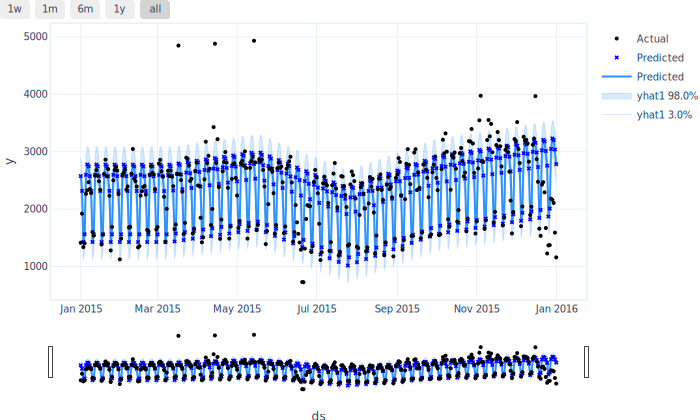

In [436]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# evaluate uncertainy on calibration set
train_df, cal_df = model.split_df(df_byopt_neupt, valid_p=0.05)
method = "naive"  # or "cqr" for a more sophisticated method, see uncertainty tutorial
conformal_forecast = model.conformal_predict(train_df, cal_df, alpha=0.1, method=method)
model.highlight_nth_step_ahead_of_each_forecast(1).plot(conformal_forecast)

### Trend Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


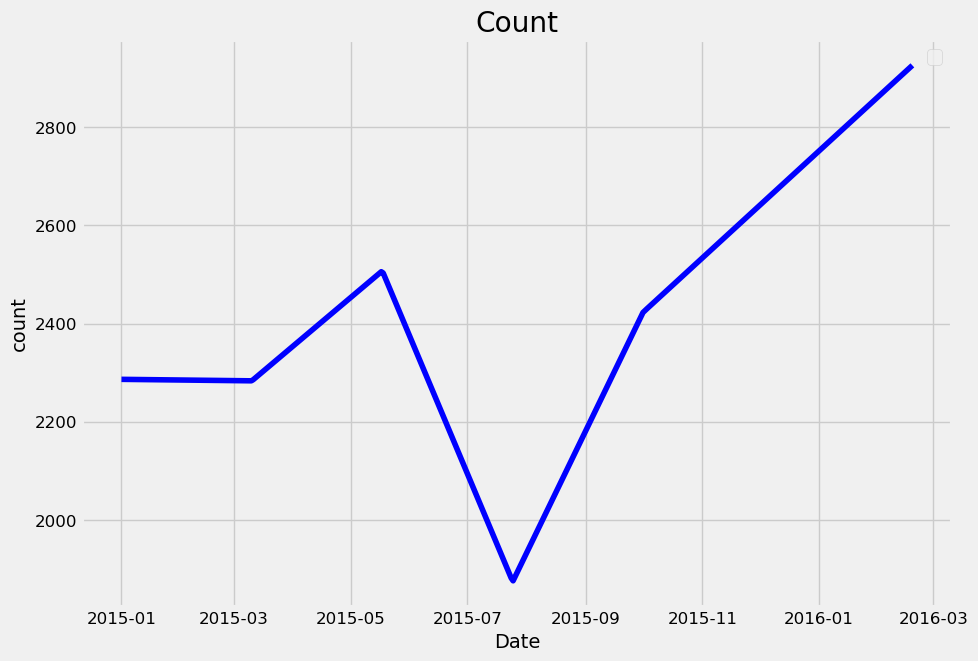

In [437]:
plt.figure(figsize=(10, 7))
plt.plot(forecast_byopt_neupt['ds'], forecast_byopt_neupt['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('count')
plt.title('Count');

### Plot Components of Time-series

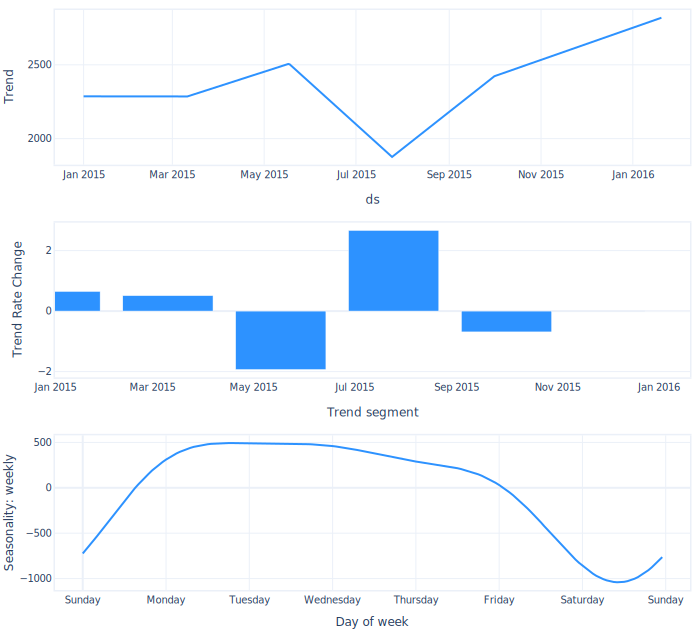

In [438]:
#plotting components of model
model.plot_parameters()

### Modelin Diagnostik qrafikləri çıxarılır¶

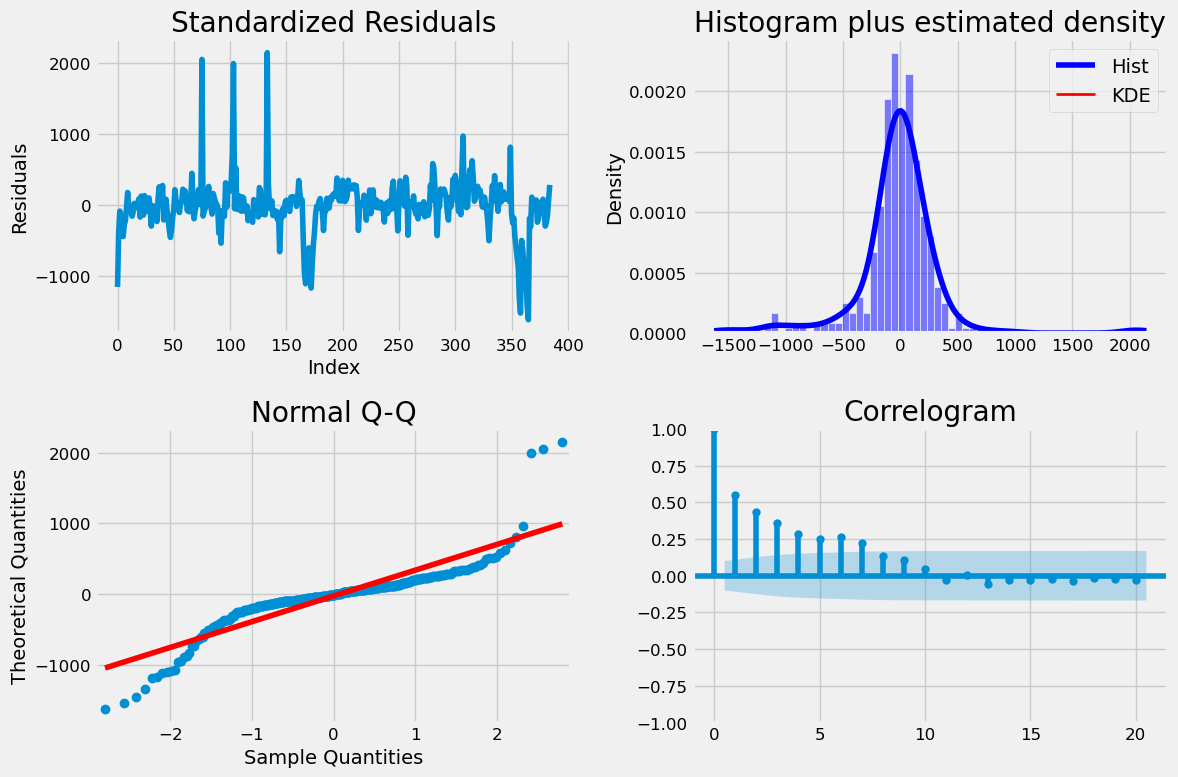

In [439]:
import seaborn as sns

# Qalıqları hesablayın
residuals = df_byopt_neupt['y'] - forecast_byopt_neupt['yhat1'][:len(df_byopt_neupt)]

# Vizualizasiya üçün tərtibat
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standartlaşdırılmış qalıqlar
axs[0, 0].plot(residuals)
axs[0, 0].set_title('Standardized Residuals')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Residuals')

# 2. Histogram və KDE
sns.histplot(residuals, kde=True, ax=axs[0, 1], stat='density', color='blue')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].axhline(0, color='red', lw=2)
axs[0, 1].legend(['Hist', 'KDE'])

# 3. Q-Q Plot
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s', ax=axs[1, 0])  # line='s' xətdə qırmızı xətt çəkmək üçündür
axs[1, 0].set_title('Normal Q-Q')
axs[1, 0].set_xlabel('Sample Quantities')
axs[1, 0].set_ylabel('Theoretical Quantities')
plt.grid(True)


# 4. Korrelogram
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axs[1, 1], lags=20)
axs[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

### 1. Her Epoch ucun Modelin təlimi zamanı performans ölçülərini əldə etmək:

In [440]:
# Her Epoch ucun Təlim prosesinin metriklərini əldə etmək
train_metrics = metrics
print(train_metrics)

    train_loss  reg_loss          MAE         RMSE      Loss   RegLoss  epoch
0     1.187479  0.000000  1540.911865  1835.294067  1.164349  0.000000      0
1     0.234004  0.000000   675.889709   812.362671  0.227459  0.000000      1
2     0.197292  0.000000   490.462280   633.710754  0.197574  0.000000      2
3     0.149573  0.000000   357.813904   476.687073  0.145339  0.000000      3
4     0.113183  0.000000   353.441284   476.605713  0.109938  0.000000      4
5     0.093810  0.000000   418.619843   551.277832  0.104654  0.000000      5
6     0.485077  0.000000  1478.910034  2043.578857  0.467381  0.000000      6
7     0.258518  0.000000   756.708923   915.126465  0.250810  0.000000      7
8     0.285001  0.000000   902.571106  1110.515503  0.282206  0.000000      8
9     0.430634  0.000000  1253.155518  1694.029785  0.420422  0.000000      9
10    0.240225  0.000000   725.665527   879.994751  0.234104  0.000000     10
11    0.302288  0.000000   901.499939  1089.425049  0.299482  0.

### 2. Son nəticə olaraq tək bir metrik (MAE və ya MSE) əldə etmək:¶

In [441]:
# Metrikləri çıxarmaq
final_mae = metrics['MAE'].values[-1]  # MAE dəyərinin sonuncu iterasiyasını əldə edir
final_rmse = metrics['RMSE'].values[-1]  # MSE dəyərinin sonuncu iterasiyasını əldə edir

# Metrikləri çap etmək
print(f"Final MAE: {final_mae}")
print(f"Final RMSE: {final_rmse}")

Final MAE: 208.1348419189453
Final RMSE: 321.0631103515625


### 3. Proqnozdan sonra metrikləri əldə etmək:

In [442]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = df_byopt_neupt['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast_byopt_neupt['yhat1'][:len(df_byopt_neupt['y'])] # Proqnozlaşdırılan dəyərlər


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): 0.6920751980917246
Mean Absolute Error (MAE): 213.3684639350876
Mean Absolute Percentage Error (MAPE): 0.10274176345473443
Mean Squared Error (MSE): 133103.76310053343
Root Mean Squared Error (RMSE): 364.83388425492143


### Difference show with Real and Pred

In [446]:
pd.DataFrame({'date': df_byopt_neupt.ds, 'real': y_true.values, 'frcst': y_pred.values, 
                                                      'diff': y_true.values - y_pred.values})

date    real        frcst         diff
0   2015-01-01  1414.0  2575.679688 -1161.679688
1   2015-01-02  1920.0  2317.143555  -397.143555
2   2015-01-03  1338.0  1427.826050   -89.826050
3   2015-01-04  1404.0  1562.867676  -158.867676
4   2015-01-05  2264.0  2597.411133  -333.411133
..         ...     ...          ...          ...
380 2016-01-16  1644.0  1945.659912  -301.659912
381 2016-01-17  1836.0  2084.693848  -248.693848
382 2016-01-18  2983.0  3123.615723  -140.615723
383 2016-01-19  3389.0  3305.498047    83.501953
384 2016-01-20  3559.0  3278.941650   280.058350

[385 rows x 4 columns]

### Only Forecast Data

In [447]:
forecast_byopt_neupt[-30:].head(5)

ds   y        yhat1   yhat1 3.0%  yhat1 98.0%        trend  \
385 2016-01-21 NaN  3111.908447  1717.209717  4550.698242  2822.415039   
386 2016-01-22 NaN  2856.895264  1433.698120  4039.786133  2825.983398   
387 2016-01-23 NaN  1970.446655   967.316528  3008.457275  2829.551514   
388 2016-01-24 NaN  2109.868164  1066.758545  3088.221680  2833.119873   
389 2016-01-25 NaN  3147.864258  1837.274780  4316.951172  2836.688232   

     season_weekly  
385     289.493408  
386      30.911766  
387    -859.104858  
388    -723.251892  
389     311.176086